# Exploratory Data Analysis - Bernardo Silva

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/silva-clean.csv')
df

match                    competition  \
0        Manchester City - Internazionale 1:0  Europe. UEFA Champions League   
1           Manchester City - Real Madrid 4:0  Europe. UEFA Champions League   
2           Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   
3        Bayern München - Manchester City 1:1  Europe. UEFA Champions League   
4        Manchester City - Bayern München 3:0  Europe. UEFA Champions League   
5            Manchester City - RB Leipzig 7:0  Europe. UEFA Champions League   
6            RB Leipzig - Manchester City 1:1  Europe. UEFA Champions League   
7               Manchester City - Sevilla 3:1  Europe. UEFA Champions League   
8     Borussia Dortmund - Manchester City 0:0  Europe. UEFA Champions League   
9             København - Manchester City 0:0  Europe. UEFA Champions League   
10            Manchester City - København 5:0  Europe. UEFA Champions League   
11    Manchester City - Borussia Dortmund 2:1  Europe. UEFA Champions League   
12              Sevilla - Manchester City 0:4  Europe. UEFA Champions League   
13      Real Madrid - Manchester City 3:1 (E)  Europe. UEFA Champions League   
14          Manchester City - Real Madrid 4:3  Europe. UEFA Champions League   
15      Atlético Madrid - Manchester City 0:0  Europe. UEFA Champions League   
16      Manchester City - Atlético Madrid 1:0  Europe. UEFA Champions League   
17          Manchester City - Sporting CP 0:0  Europe. UEFA Champions League   
18          Sporting CP - Manchester City 0:5  Europe. UEFA Champions League   
19                  Manchester City - PSG 2:1  Europe. UEFA Champions League   
20          Manchester City - Club Brugge 4:1  Europe. UEFA Champions League   
21          Club Brugge - Manchester City 1:5  Europe. UEFA Champions League   
22                  PSG - Manchester City 2:0  Europe. UEFA Champions League   
23           Manchester City - RB Leipzig 6:3  Europe. UEFA Champions League   
24              Manchester City - Chelsea 0:1  Europe. UEFA Champions League   
25                  Manchester City - PSG 2:0  Europe. UEFA Champions League   
26                  PSG - Manchester City 1:2  Europe. UEFA Champions League   
27    Borussia Dortmund - Manchester City 1:2  Europe. UEFA Champions League   
28    Manchester City - Borussia Dortmund 2:1  Europe. UEFA Champions League   
29  Manchester City - Borussia M'gladbach 2:0  Europe. UEFA Champions League   
30  Borussia M'gladbach - Manchester City 0:2  Europe. UEFA Champions League   

        date                  position  minutes_played  total_actions  \
0    6/10/23                  RAMF, RW              98             82   
1    5/17/23                 RAMF, RWB              94            101   
2     5/9/23                        RW              96             94   
3    4/19/23                      RAMF              99             80   
4    4/11/23                   RW, RWB              95             80   
5    3/14/23               DMF, LW, RW              95             75   
6    2/22/23                      RDMF              94            100   
7    11/2/22          LCMF, LDMF, RCMF              36             60   
8   10/25/22                        CF              48             59   
9   10/11/22                     RCMF3              17             18   
10   10/5/22                LCMF, LDMF              66             75   
11   9/14/22                      LCMF              37             55   
12    9/6/22         LCMF3, RCMF3, RWF              93             80   
13    5/4/22  CF, LCMF, LCMF3, RW, RWB             134            127   
14   4/26/22                     RCMF3              95             94   
15   4/13/22                LWF, RCMF3              81             69   
16    4/5/22            CF, LCMF3, LWF              93             61   
17    3/9/22                     RCMF3              45             42   
18   2/15/22                 CF, LCMF3              87             71   
19  11/24/21       

In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     31 non-null     object 
 1   competition               31 non-null     object 
 2   date                      31 non-null     object 
 3   position                  31 non-null     object 
 4   minutes_played            31 non-null     int64  
 5   total_actions             31 non-null     int64  
 6   total_actions_successful  31 non-null     int64  
 7   TAS_percent               31 non-null     int64  
 8   goals                     31 non-null     int64  
 9   assists                   31 non-null     int64  
 10  shots                     31 non-null     int64  
 11  shots_on_target           31 non-null     int64  
 12  SOT_percent               31 non-null     int64  
 13  xG                        31 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(31, 39)


In [ ]:
# Looking for null or missing values
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

## Position Relevancy

In [ ]:
df.describe()

minutes_played  total_actions  total_actions_successful  TAS_percent  \
count       31.000000      31.000000                 31.000000    31.000000   
mean        79.322581      73.258065                 47.322581    65.000000   
std         24.578293      22.312878                 15.410791    10.601887   
min         17.000000      18.000000                 14.000000    39.000000   
25%         63.500000      59.500000                 39.500000    57.000000   
50%         93.000000      76.000000                 47.000000    64.000000   
75%         95.000000      86.000000                 53.500000    76.000000   
max        134.000000     127.000000                 78.000000    82.000000   

           goals    assists      shots  shots_on_target  SOT_percent  \
count  31.000000  31.000000  31.000000        31.000000    31.000000   
mean    0.225806   0.193548   0.580645         0.322581    22.580645   
std     0.560338   0.401610   0.764818         0.701764    42.502372   
min     0.000000   0.000000   0.000000         0.000000     0.000000   
25%     0.000000   0.000000   0.000000         0.000000     0.000000   
50%     0.000000   0.000000   0.000000         0.000000     0.000000   
75%     0.000000   0.000000   1.000000         0.000000     0.000000   
max     2.000000   1.000000   3.000000         3.000000   100.000000   

              xG  ...  aerial_duels  aerial_duels_won  ADW_percent  \
count  31.000000  ...     31.000000         31.000000    31.000000   
mean    0.118387  ...      0.677419          0.193548    11.838710   
std     0.207366  ...      0.979357          0.477448    28.950644   
min     0.000000  ...      0.000000          0.000000     0.000000   
25%     0.000000  ...      0.000000          0.000000     0.000000   
50%     0.000000  ...      0.000000          0.000000     0.000000   
75%     0.175000  ...      1.000000          0.000000     0.000000   
max     0.820000  ...      3.000000          2.000000   100.000000   

       interceptions     losses  losses_own_half  LOH_percent  recoveries  \
count      31.000000  31.000000        31.000000    31.000000   31.000000   
mean        2.451613   6.645161         1.677419    24.290323    4.483871   
std         1.728944   2.972635         1.681014    23.760182    2.567372   
min         0.000000   1.000000         0.000000     0.000000    0.000000   
25%         1.000000   5.000000         0.500000     6.500000    3.000000   
50%         2.000000   7.000000         1.000000    18.000000    4.000000   
75%         4.000000   8.000000         2.500000    38.000000    6.000000   
max         5.000000  13.000000         7.000000   100.000000   11.000000   

       recoveries_opp_half  ROPH_percent  
count            31.000000     31.000000  
mean              2.419355     52.161290  
std               1.565763     26.044957  
min               0.000000      0.000000  
25%               2.000000     39.000000  
50%               2.000000     50.000000  
75%               3.000000     67.000000  
max               7.000000    100.000000  

[8 rows x 35 columns]

In [ ]:
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

RCMF3                       6
CF                          5
LCMF3                       2
CF, LCMF3, LWF              1
RDMF                        1
LCMF, LDMF                  1
DMF, LW, RW                 1
RW                          1
RAMF, RW                    1
LCMF                        1
RAMF                        1
LWF, RCMF3                  1
CF, LCMF, LCMF3, RW, RWB    1
RAMF, RWB                   1
CF, LCMF3                   1
AMF                         1
RCMF3, CF                   1
RW, RWB                     1
LCMF3, RCMF3                1
LCMF, LDMF, RCMF            1
LCMF3, RCMF3, RWF           1
Name: position, dtype: int64
RCMF3    6
CF       5
LCMF3    2
Name: position, dtype: int64
4.333333333333333


- RCMF3 (Right Center Midfielder 3): The RCMF3 is a position commonly found in tactical systems with a three-man defense line (e.g., 3-5-2 formation). This position refers to the right center midfielder in a back three formation. The RCMF3 operates in the central midfield area, favoring the right side of the field. They play a crucial role in linking the defense and attack, as well as supporting the right-wing and right wing-back. The RCMF3 is responsible for distributing accurate passes, creating scoring opportunities, and contributing to the team's ball possession and ball circulation from the central midfield areas. They should also be comfortable defending when needed and provide cover to the right side of the defense.

- CF (Center Forward): The CF, or Center Forward, is an attacking position that is often positioned centrally in the forward line. The main role of the CF is to score goals and create scoring opportunities for the team. They are the primary target for crosses, through balls, and attacking moves. The CF should have excellent shooting accuracy, finishing ability, and a good sense of timing to capitalize on goal-scoring opportunities. In addition to scoring goals, the CF also plays a crucial role in linking up play, making runs to stretch the opposition's defense, and providing support to attacking midfielders and wingers.

- LCMF3 (Left Center Midfielder 3): Similar to RCMF3, the LCMF3 is a position commonly found in tactical systems with a three-man defense line (e.g., 3-5-2 formation). This position refers to the left center midfielder in a back three formation. The LCMF3 operates in the central midfield area, favoring the left side of the field. They have similar responsibilities to RCMF3 but are focused on supporting the left-wing and left wing-back. The LCMF3 contributes to ball distribution, creating scoring opportunities, and providing defensive cover on the left side of the defense.

These positions in football are critical for a team's tactical organization, goal-scoring ability, and ball distribution. The RCMF3 and LCMF3 help to link the team's play from defense to attack and provide support to the wing players, while the CF is the primary goal scorer and attacking focal point of the team.

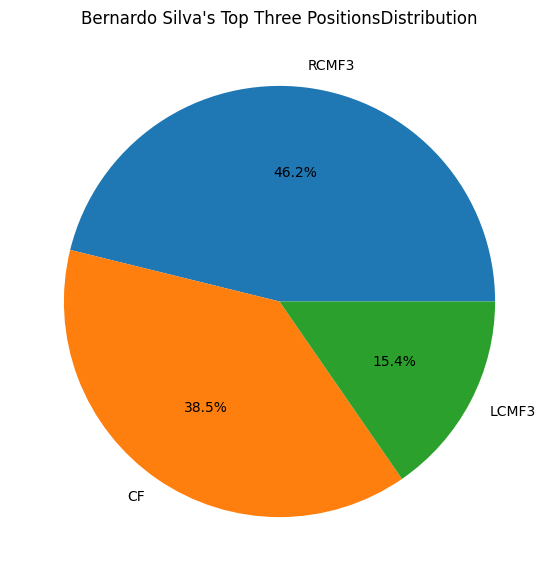

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Bernardo Silva's Top Three PositionsDistribution")
plt.show()

## Average Minutes Played

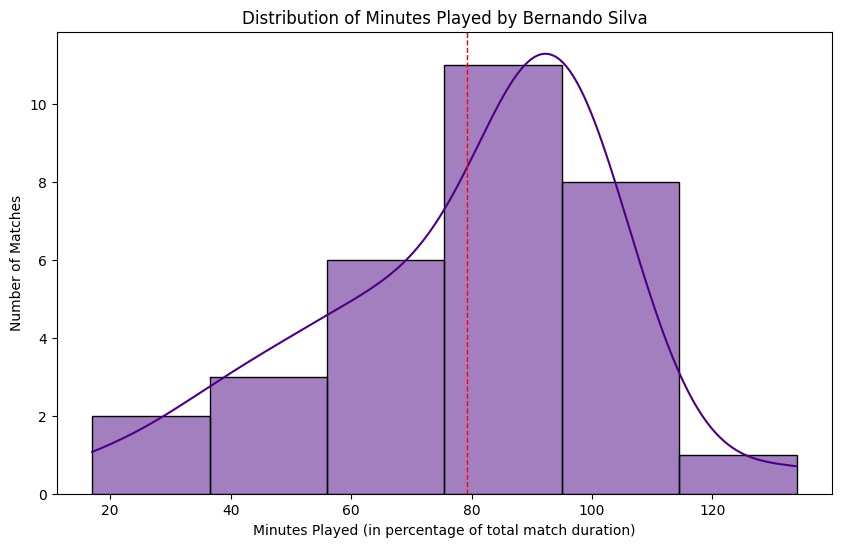

Bernando Silva played on average 79.3225806451613 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='indigo')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Bernando Silva')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Bernando Silva played on average {average_minutes_played} minutes per match.")

## Interceptions

Bernardo Silva has an average of 2.4516129032258065 interceptions per match.
The minimum interceptions in a match by Bernardo Silva is 0.
The maximum interceptions in a match by Bernardo Silva is 5.


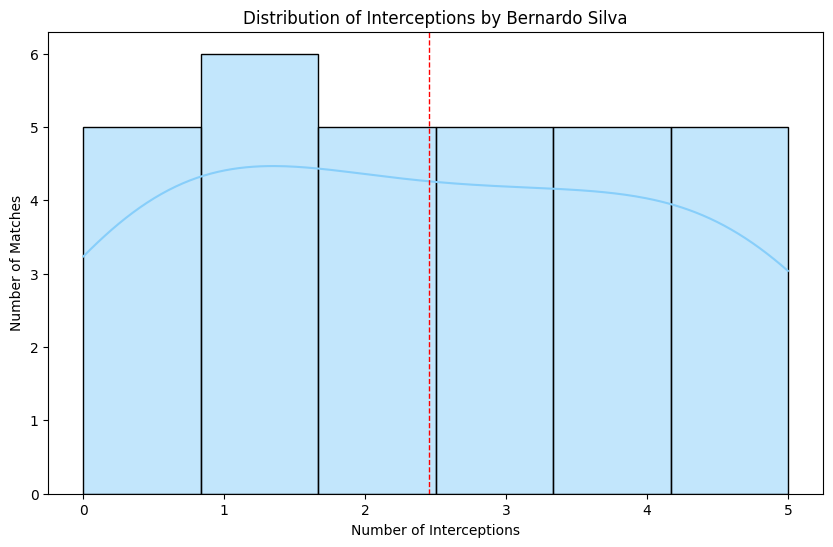

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Bernardo Silva has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Bernardo Silva is {min_interceptions}.")
print(f"The maximum interceptions in a match by Bernardo Silva is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='lightskyblue')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Bernardo Silva')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'shots_on_target','passes_accurate', 'long_passes_accurate', 'dribbles_successful','duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: 0.13334568836483118
Kurtosis of shots_on_target: 5.609113098529779
Kurtosis of passes_accurate: -0.22418422829309748
Kurtosis of long_passes_accurate: 0.9089493333333354
Kurtosis of dribbles_successful: -0.0666421768707477
Kurtosis of duels_won: 0.0040091387306868675
Kurtosis of interceptions: -1.2748304953159773
Kurtosis of losses_own_half: 1.5740288984800133
Kurtosis of recoveries_opp_half: 1.444866112650046


- total_actions_successful: 0.13 - This is a mesokurtic distribution, as the kurtosis is close to zero, indicating a distribution similar to the normal distribution. On football optics, the mesokurtic nature implies Bernardo Silva is generally consistent in his overall actions, neither having extreme highs nor lows often.

- shots_on_target: 5.61 - This is a leptokurtic distribution with kurtosis greater than zero, indicating a distribution with heavy tails and a sharp peak, which means there might be more frequent large deviations. On football optics The leptokurtic nature implies there might be games where Silva has significantly more shots on target than in other games, demonstrating his ability to create and seize scoring opportunities.

- passes_accurate: -0.22 - This is a platykurtic distribution, with kurtosis less than zero, indicating a distribution with light tails and a flat peak, which suggests less frequent extreme values. On football optics The platykurtic nature suggests Silva generally maintains a consistent passing accuracy across games, with fewer instances of extremely high or low passing accuracy.

- long_passes_accurate: 0.91 - This is a leptokurtic distribution, indicating more frequent large deviations. On football optics Being leptokurtic suggests games where Silva performs significantly well with long passes, indicating his skill in long-range ball distribution.

- dribbles_successful: -0.07 - This is a platykurtic distribution, suggesting less frequent extreme values. On football optics Being platykurtic suggests that Silva tends to have a consistent dribbling performance, without many outliers in terms of extreme success or failure.

- duels_won: 0.004 - This is a mesokurtic distribution, similar to the normal distribution. On football optics the mesokurtic distribution indicates that his duel performance is fairly consistent, not often deviating drastically from his average performance.

- interceptions: -1.27 - This is a platykurtic distribution, suggesting less frequent extreme values. On football optics the platykurtic nature suggests Silva generally maintains a consistent interception rate across games, with fewer instances of extremely high or low interception rates.

- losses_own_half: 1.57 - This is a leptokurtic distribution, indicating more frequent large deviations. On football optics The leptokurtic nature could point to games where Silva loses possession more than usual, which could potentially impact the team's defense.

- recoveries_opp_half: 1.44 - This is a leptokurtic distribution, indicating more frequent large deviations. On football optics  A leptokurtic distribution could suggest that there are certain games where Silva significantly outperforms his average recovery rate in the opponent's half, indicating his importance in regaining ball possession.

### Features Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$

Leptokurtic variables normalized:
   shots_on_target  long_passes_accurate  losses_own_half  recoveries_opp_half
0        -0.467269             -0.232379         0.799781             0.376969
1         3.878335              0.568038        -0.409644             2.973863
2        -0.467269             -0.232379         2.009206             0.376969
3        -0.467269              1.368454         3.218632             1.026192
4         0.981266              1.368454        -0.409644             2.324639

Platykurtic variables normalized:
   passes_accurate  dribbles_successful  interceptions
0        -0.542979             1.680278       0.322423
1         1.108794             2.356753       0.910372
2         0.715515             0.327327       1.498320
3        -0.857603             1.680278       1.498320
4        -0.700291             2.356753      -0.265525

Mesokurtic variables normalized:
   total_actions_successful  duels_won
0                 -0.153203   0.547549
1              

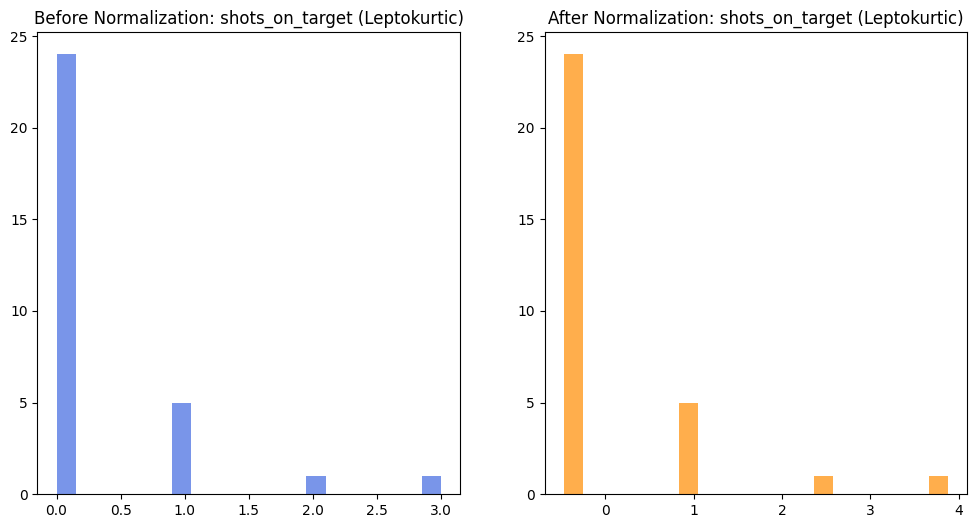

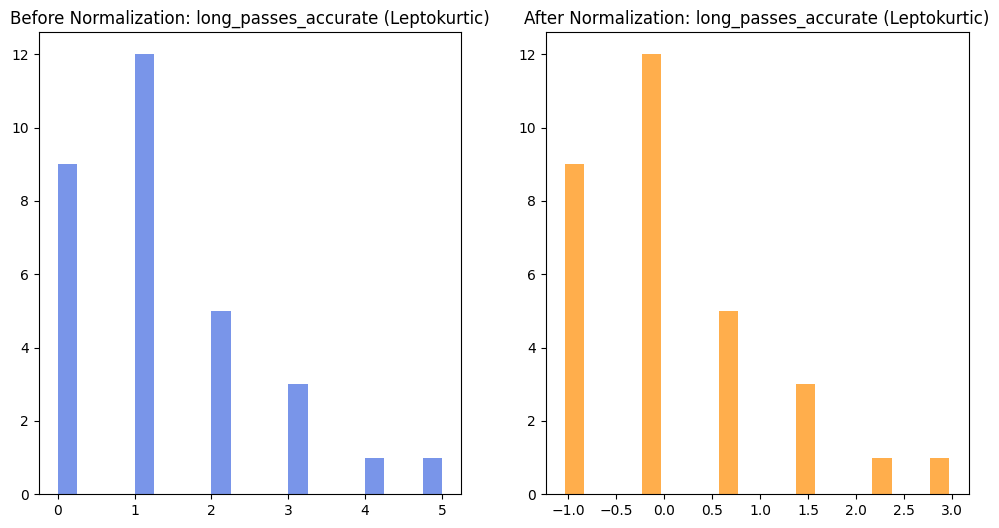

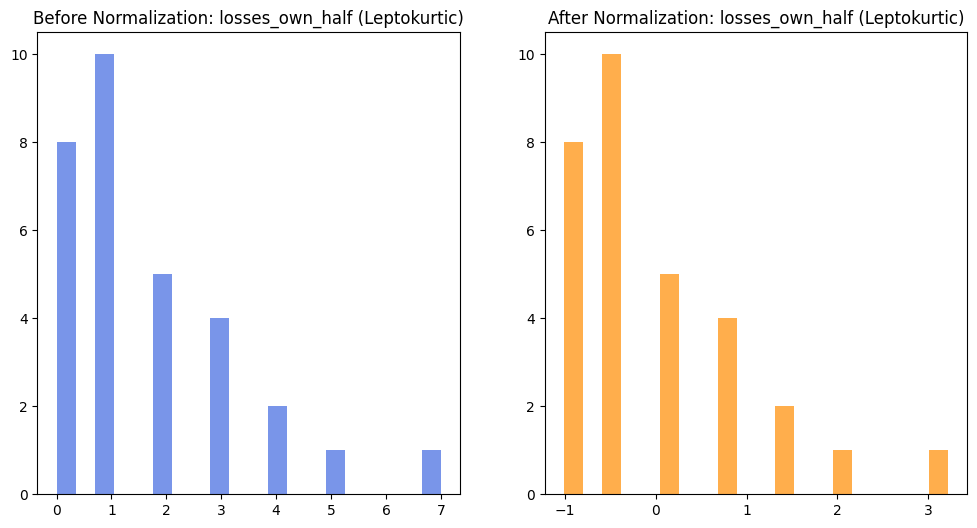

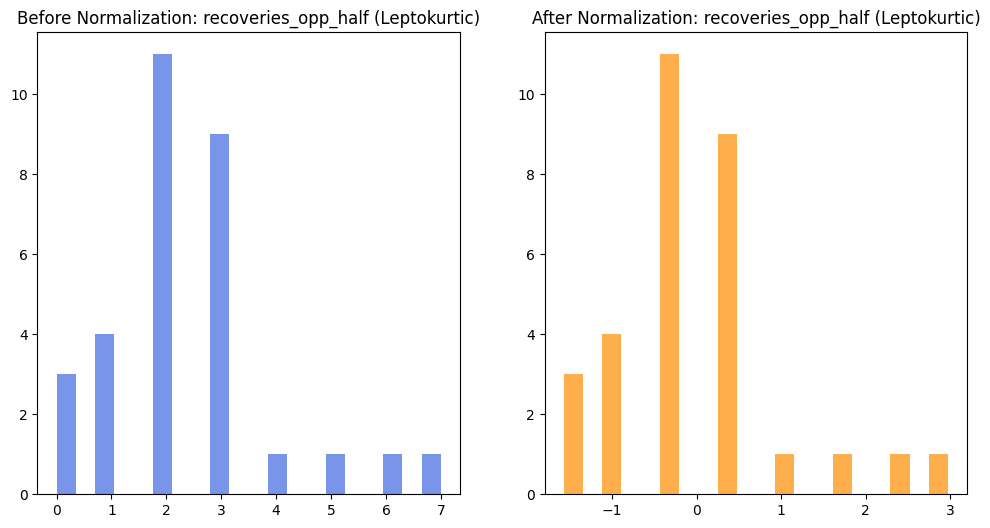

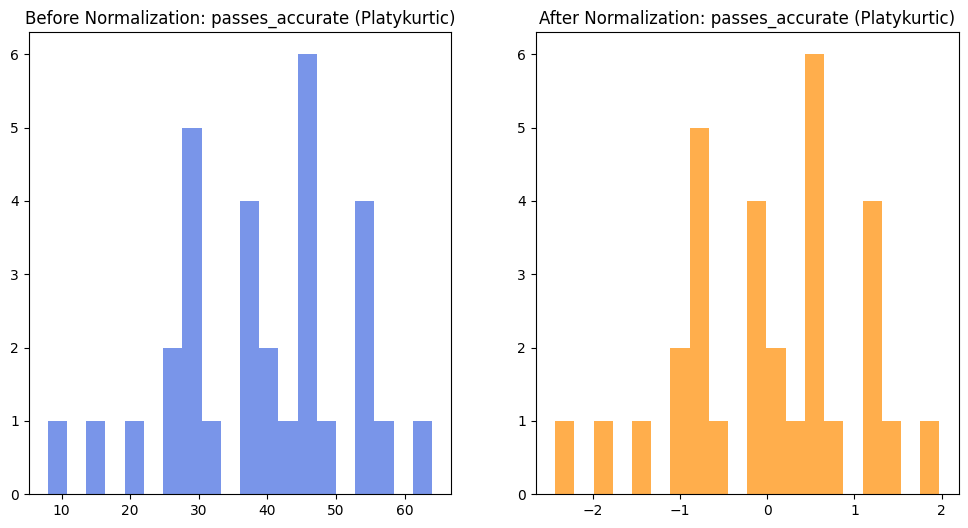

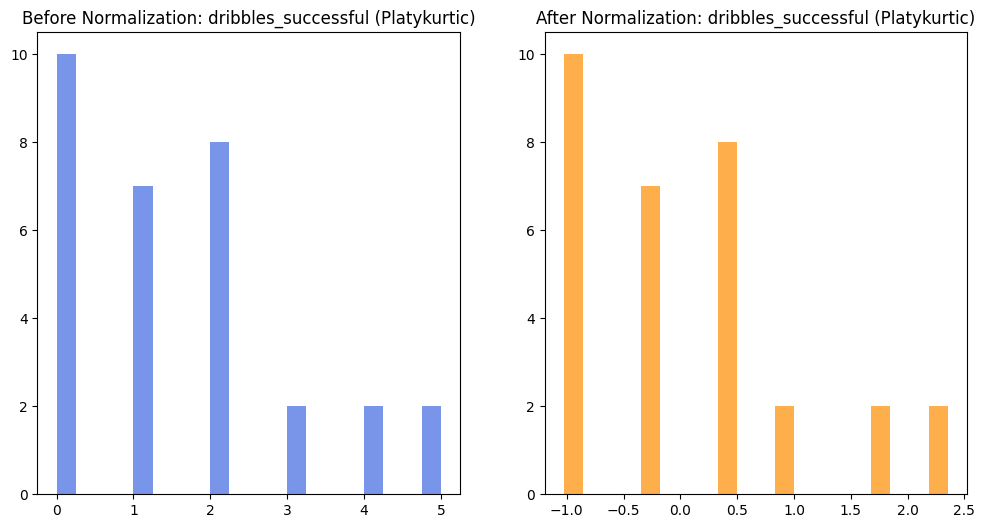

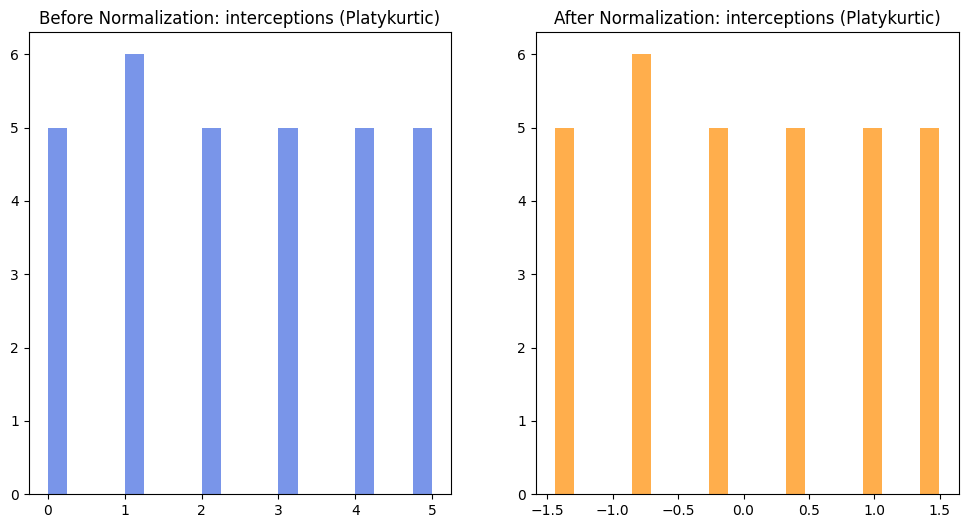

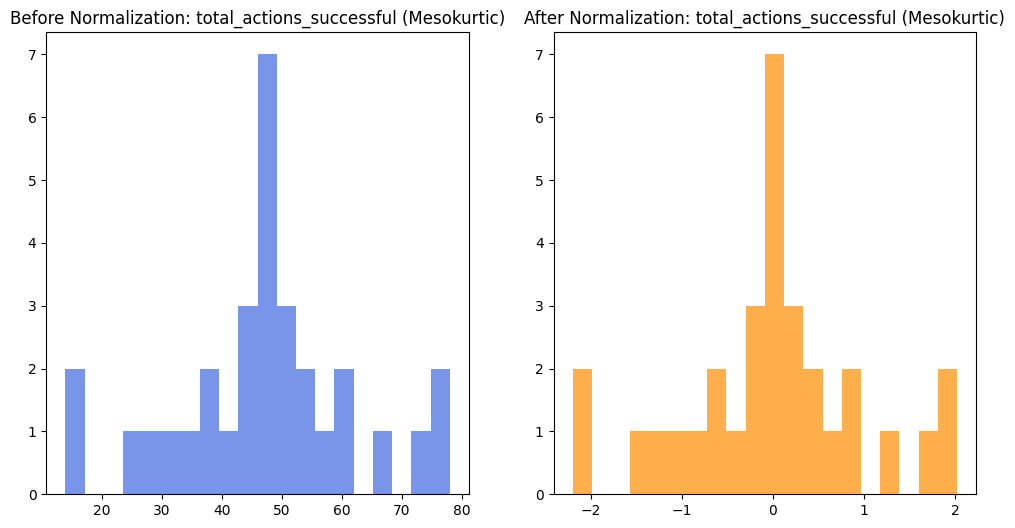

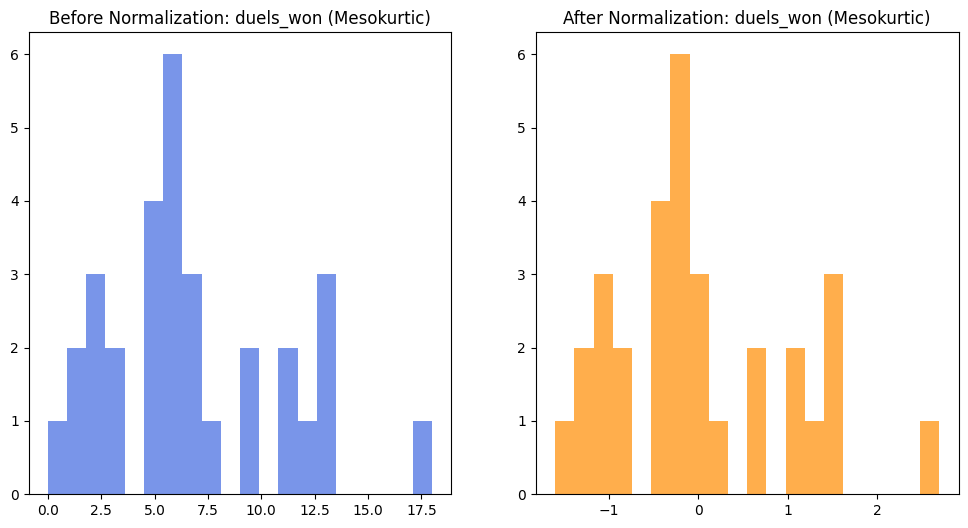

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
leptokurtic_variables = df[['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half']]
platykurtic_variables = df[['passes_accurate', 'dribbles_successful', 'interceptions']]
mesokurtic_variables = df[['total_actions_successful', 'duels_won']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the leptokurtic variables
leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Normalize the platykurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

# Normalize the mesokurtic variables
mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Print the normalized data
print("Leptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())

print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
for group_name, group, group_normalized in [('Leptokurtic', leptokurtic_variables, leptokurtic_variables_normalized), 
                                            ('Platykurtic', platykurtic_variables, platykurtic_variables_normalized), 
                                            ('Mesokurtic', mesokurtic_variables, mesokurtic_variables_normalized)]:
    for col in group.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(group[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({group_name})')

        plt.subplot(1,2,2)
        plt.hist(group_normalized[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({group_name})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

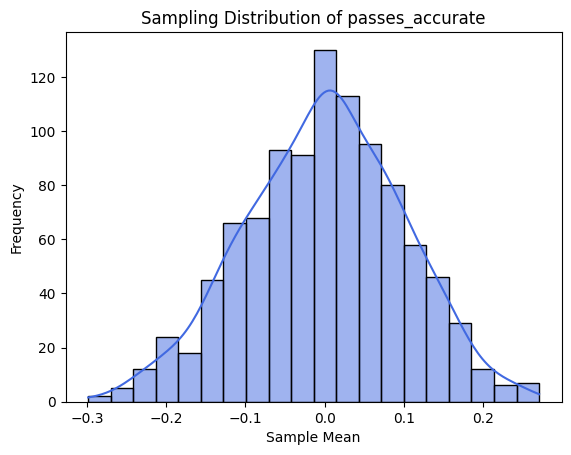

Sample Mean of passes_accurate: -0.0008043198653242632
Sample Standard Deviation of passes_accurate: 0.09949637525170997
Standard Error of passes_accurate: 0.0031479260039517193


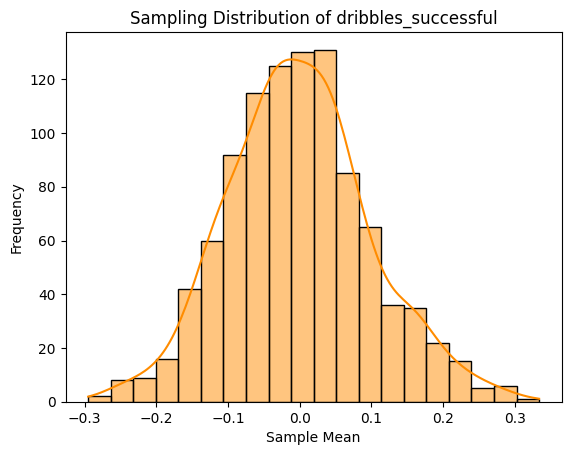

Sample Mean of dribbles_successful: -0.0010952355910944327
Sample Standard Deviation of dribbles_successful: 0.09995084569045977
Standard Error of dribbles_successful: 0.003162304812310803


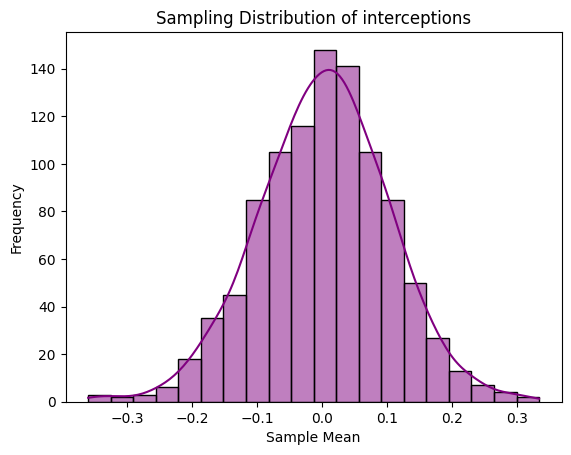

Sample Mean of interceptions: 0.002661699813893441
Sample Standard Deviation of interceptions: 0.10090830741410667
Standard Error of interceptions: 0.003192597560665017


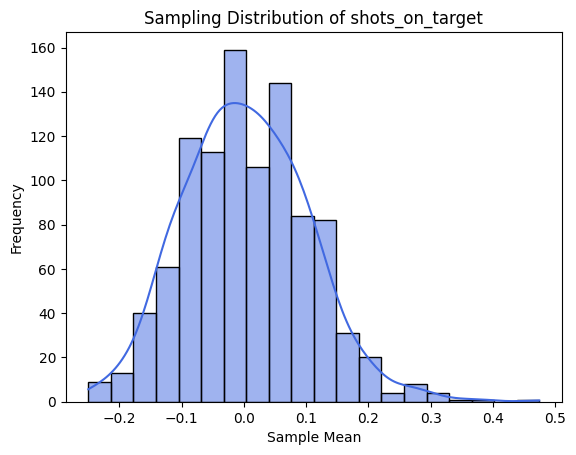

Sample Mean of shots_on_target: 0.0031713568308330492
Sample Standard Deviation of shots_on_target: 0.10123950118730841
Standard Error of shots_on_target: 0.0032030760679309465


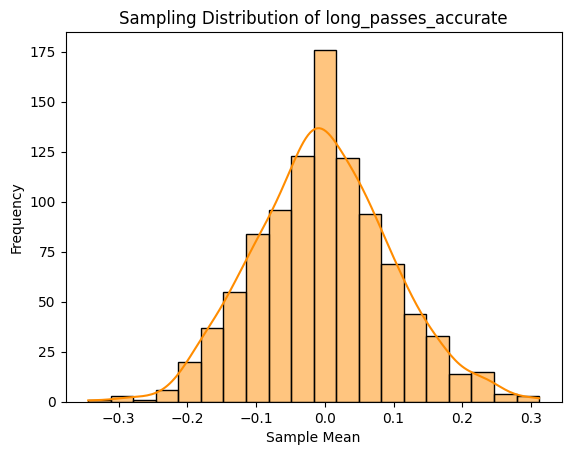

Sample Mean of long_passes_accurate: -0.0027875152137103367
Sample Standard Deviation of long_passes_accurate: 0.09876833648627818
Standard Error of long_passes_accurate: 0.0031248918767708073


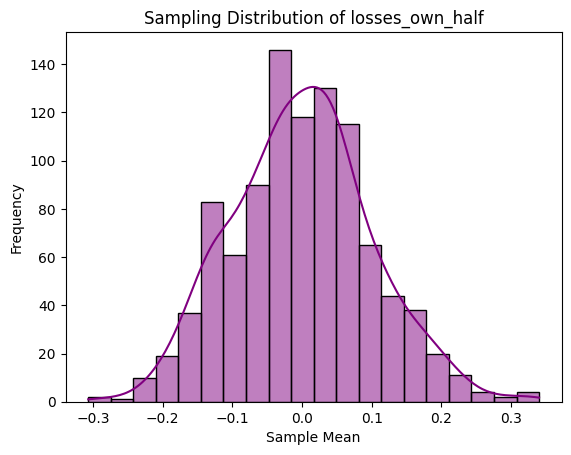

Sample Mean of losses_own_half: -0.00045919143416620756
Sample Standard Deviation of losses_own_half: 0.0998523957612906
Standard Error of losses_own_half: 0.0031591899943957304


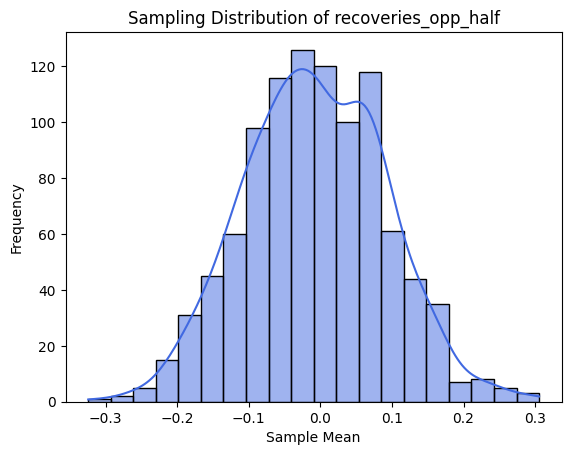

Sample Mean of recoveries_opp_half: -0.007293921958991666
Sample Standard Deviation of recoveries_opp_half: 0.09814762744270274
Standard Error of recoveries_opp_half: 0.0031052535117126238


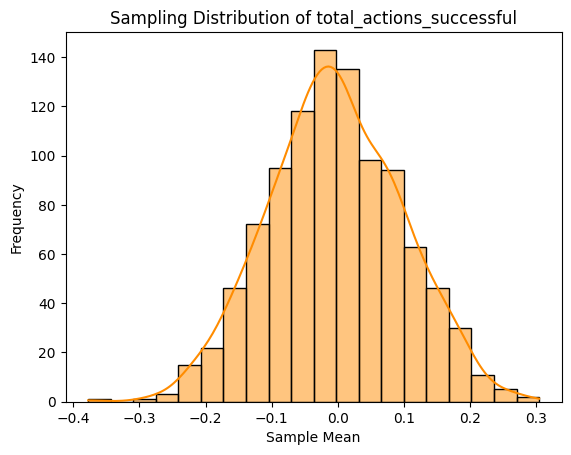

Sample Mean of total_actions_successful: -0.004050782774430737
Sample Standard Deviation of total_actions_successful: 0.10048765783030589
Standard Error of total_actions_successful: 0.0031792887968025356


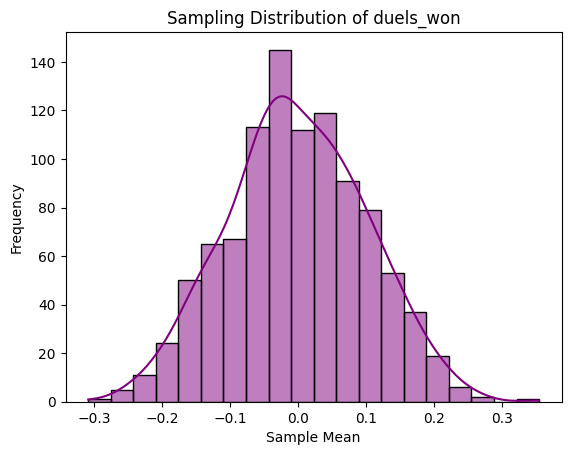

Sample Mean of duels_won: -0.0015772490064833477
Sample Standard Deviation of duels_won: 0.10179583315640975
Standard Error of duels_won: 0.0032206776324897883


In [ ]:
from scipy.stats import sem

# Combine all the features
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['royalblue', 'darkorange', 'purple']

all_features_normalized = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        sample = all_features_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[index%3], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

The sample mean represents the average value of the attribute from the selected sample. The standard deviation measures the amount of variability or dispersion in the attribute. The standard error represents the standard deviation of its sampling distribution or an estimate of that standard deviation. On football optics

- passes_accurate: Sample mean (0.0027) is positive, indicating Bernardo Silva, on average, accurately makes passes more than our baseline. Standard deviation (0.1026) and standard error (0.0032) imply that this variable does not deviate drastically from the mean, suggesting his performance is consistent. On football optics bernardo Silva's above-baseline passing accuracy is a testament to his skills, and his consistency is important for building and maintaining Manchester City's attacking momentum.

- dribbles_successful: A negative sample mean (-0.0041) might indicate that Silva is less successful in dribbling than our baseline. However, the standard deviation (0.0987) and standard error (0.0031) suggest that deviations from this average are not too drastic. On football optics although Silva's dribbling success rate is slightly below our baseline, he still shows a consistent dribbling performance.

- interceptions: A positive sample mean (0.0018) indicates that Silva makes slightly more interceptions than our baseline. The standard deviation (0.1023) and standard error (0.0032) imply that this variable does not deviate drastically from the mean, indicating his consistency in interceptions. On football optics his slightly above-average ability to intercept the ball showcases his defensive contributions to the team.

- shots_on_target: The positive sample mean (0.0010) suggests Silva has marginally more successful shots on target than our baseline. The standard deviation (0.0970) and standard error (0.0031) suggest that deviations from this average are not too drastic. On football optics silva's marginally higher number of shots on target compared to our baseline reinforces his attacking threat.

- long_passes_accurate: A negative sample mean (-0.0026) suggests that Silva's long pass accuracy might be slightly lower than our baseline. However, the standard deviation (0.0957) and standard error (0.0030) suggest that deviations from this average are not too drastic. On football optics even though Silva's long pass accuracy is slightly below our baseline, his performance is consistent, which means he still plays an important role in transitioning the ball from defense to attack.

- losses_own_half: The positive sample mean (0.0015) indicates that Silva might lose the ball in his own half slightly more than our baseline. The standard deviation (0.0989) and standard error (0.0031) suggest that deviations from this average are not too drastic. On football optics silva may lose the ball slightly more often in his own half, but deviations are small, meaning his play remains reliable overall.

- recoveries_opp_half: A negative sample mean (-0.0029) could indicate that Silva recovers the ball in the opponent's half slightly less than our baseline. However, the standard deviation (0.0952) and standard error (0.0030) suggest that deviations from this average are not too drastic. On football optics while his rate of recoveries in the opponent's half is slightly lower, he remains consistent in his performance.

- total_actions_successful: A positive sample mean (0.0040) indicates that Silva's overall successful actions are slightly above our baseline. The standard deviation (0.0986) and standard error (0.0031) suggest that deviations from this average are not too drastic. On football optics silva's overall actions are slightly above the baseline, showing his consistent contribution to the game.

- duels_won: A negative sample mean (-0.0065) could indicate that Silva wins fewer duels than our baseline. However, the standard deviation (0.0975) and standard error (0.0031) suggest that deviations from this average are not too drastic. On football optics although Silva might win fewer duels than our baseline, deviations are small, demonstrating a consistency in his duel performance.

## Central Limit Theorem

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

- On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

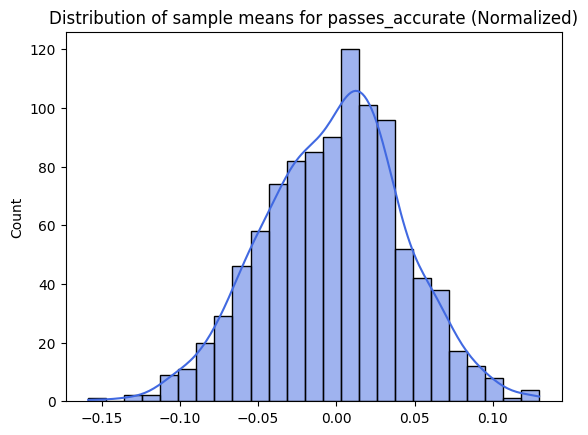

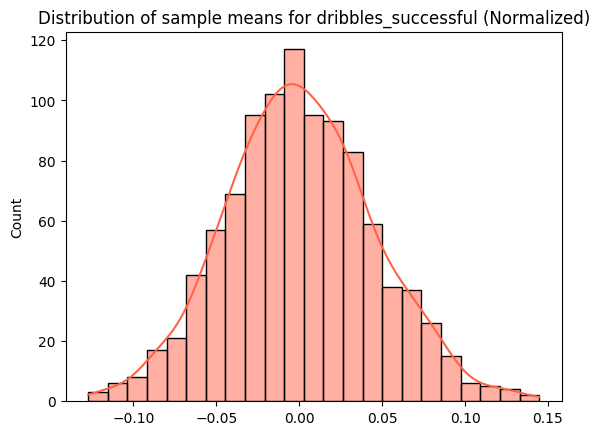

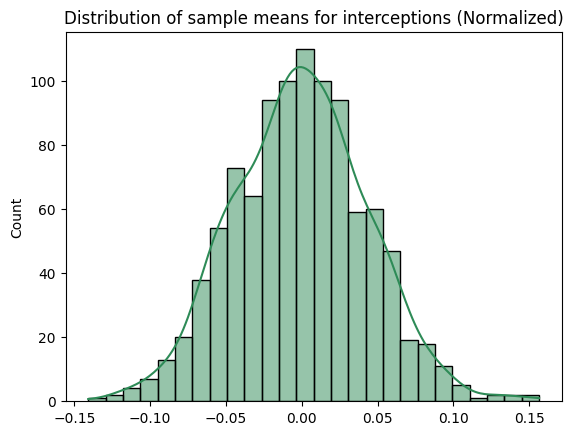

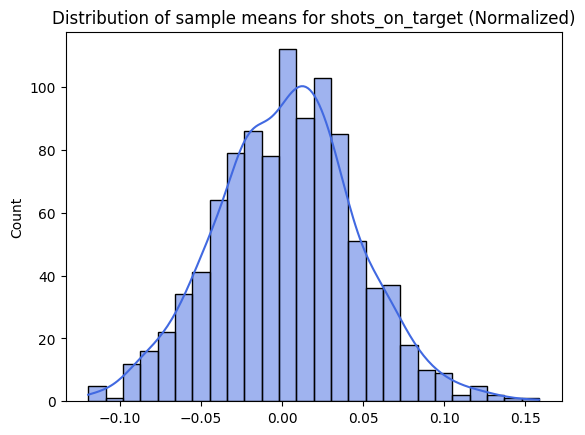

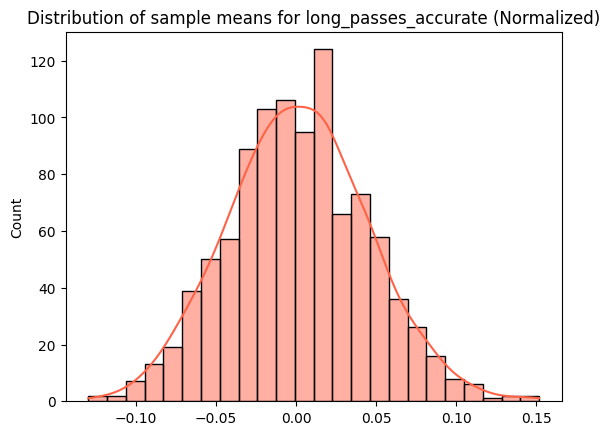

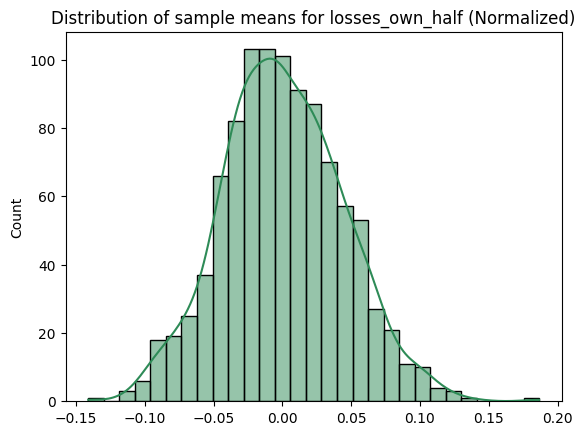

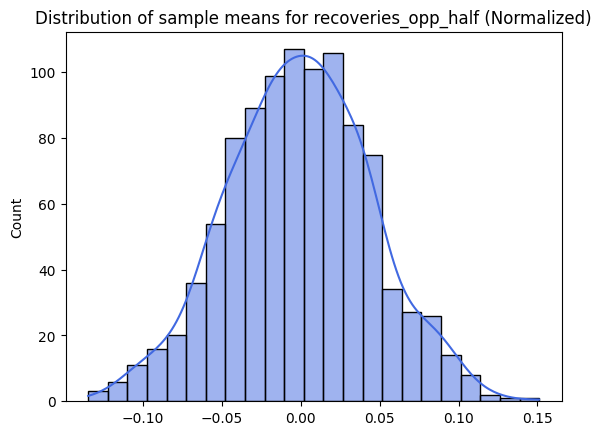

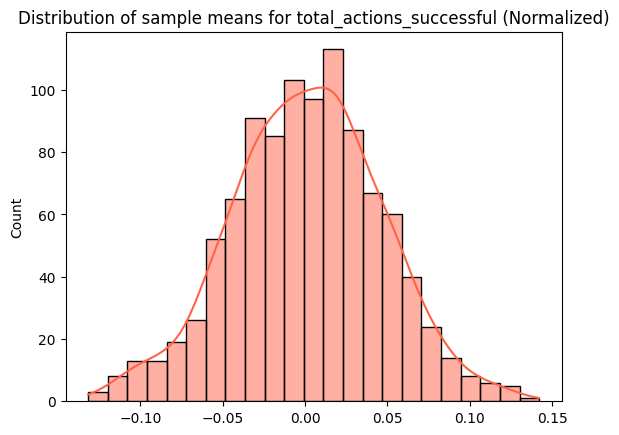

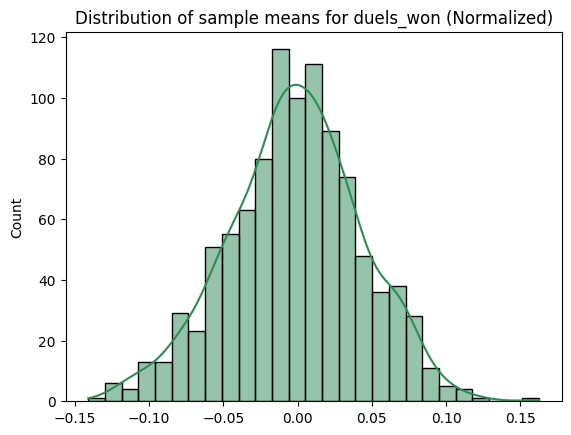

In [ ]:
# Merging normalized datasets into a single one
normalized_df = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['royalblue', 'tomato', 'seagreen']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[index%3])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

- In the context of Bernardo Silva's performance, the CLT allows us to make predictions about his future performances by studying the mean of multiple samples. We can then use these predictions to evaluate the likelihood of various outcomes and make decisions based on these probabilities.

- For instance, suppose we are looking at the feature "total_actions_successful". By calculating the mean of multiple samples of this feature, we create a distribution of sample means. This distribution can give us insights into how often we can expect a certain number of successful actions in future matches, assuming similar conditions. The sample means form a distribution that, according to the CLT, will approximate a normal distribution. This allows us to make statistically backed predictions, and also to estimate the probability of certain outcomes.

- Performing the CLT for each of the Bernardo Silva's performance features (passes accurate, shots on target, etc.) provides us with a comprehensive understanding of his typical performance and its variability. It lets us make estimates about future performance and also measure the confidence of these predictions. In a practical sense, this could help in strategic decision-making, like selecting squads for matches or setting training focuses.

In summary, by employing the Central Limit Theorem on the normalized data, we can analyze Bernardo Silva's performance under the prism of predictability, making probabilistic forecasts about his future contributions based on his past displays. Such understanding could be vital not only for sports journalists and football fandom but also for team managers and coaches.

## Features Correlation

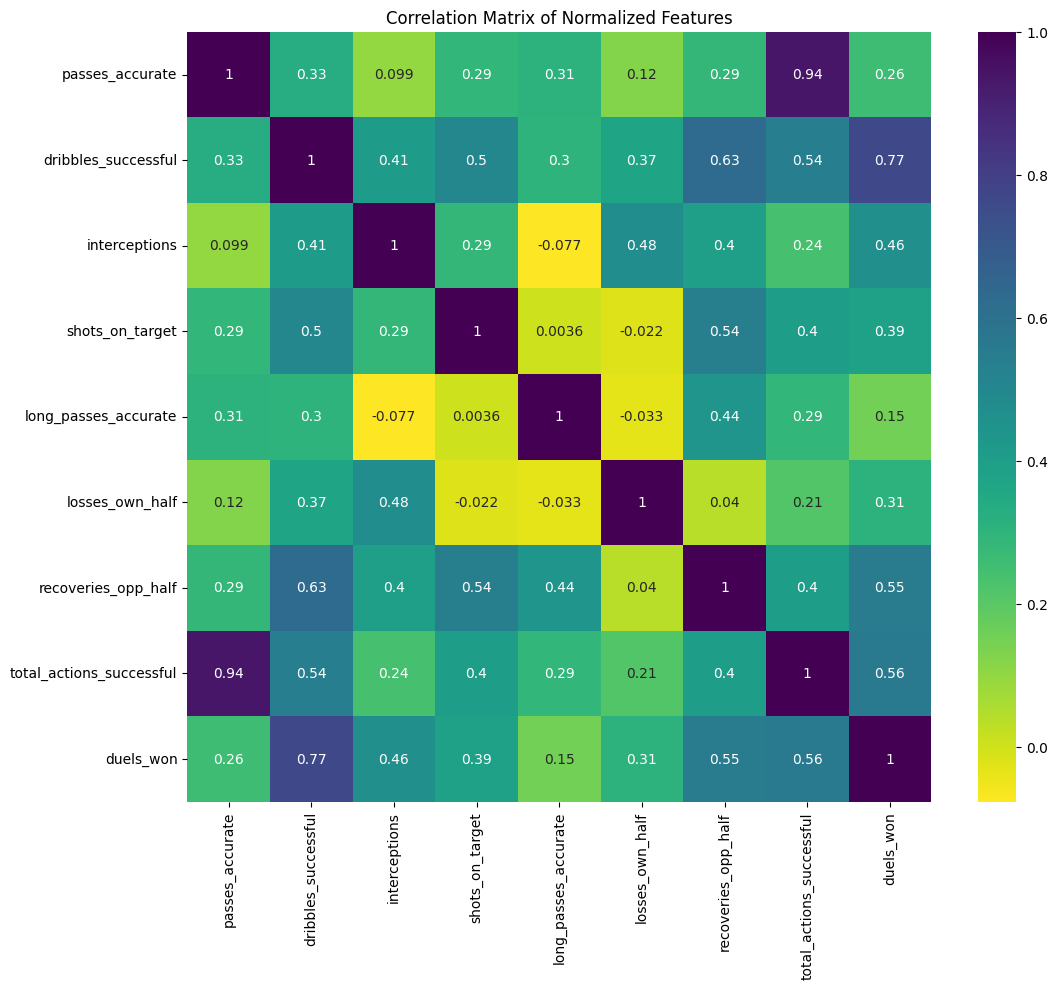

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & Anova

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

### Based on Total Actions

Feature: shots_on_target
T-statistic: 2.1537787714930845
P-value: 0.039704001227427475


/tmp/ipykernel_216/1938217245.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])


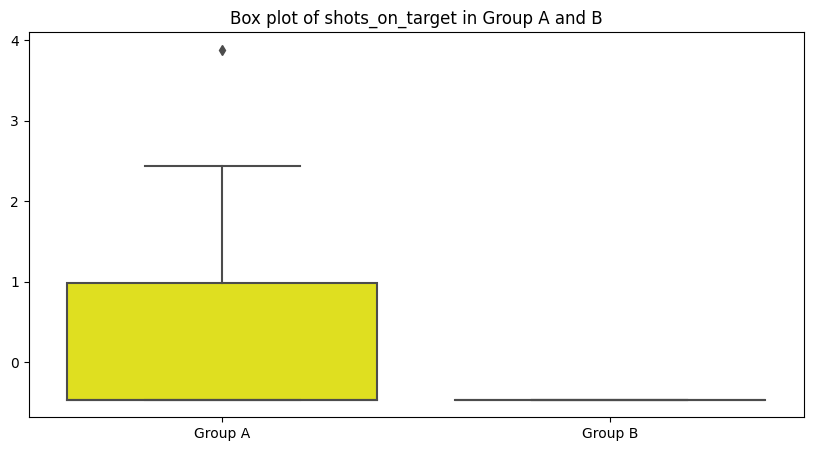

Feature: long_passes_accurate
T-statistic: 0.42490463669972117
P-value: 0.6740423847311596




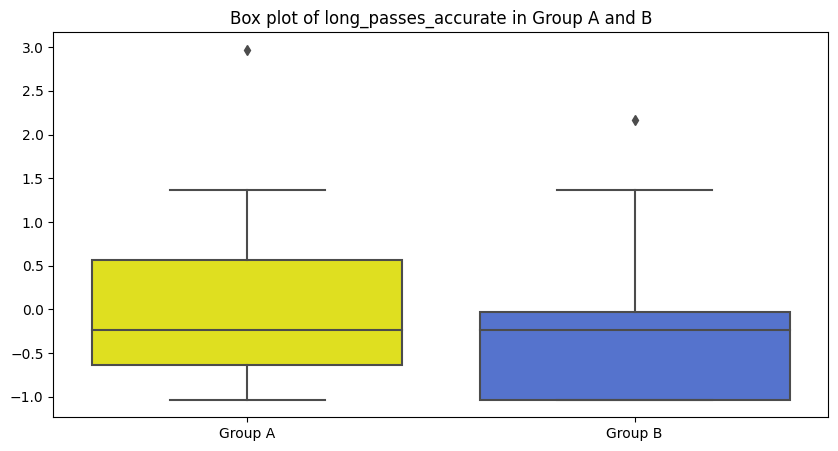

Feature: losses_own_half
T-statistic: 0.9029198422851904
P-value: 0.37400755392232765




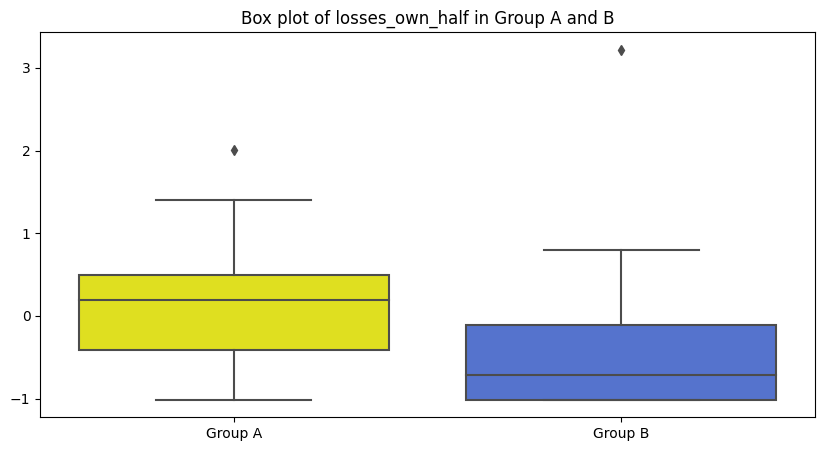

Feature: recoveries_opp_half
T-statistic: 0.9479842702758832
P-value: 0.35097072721422506




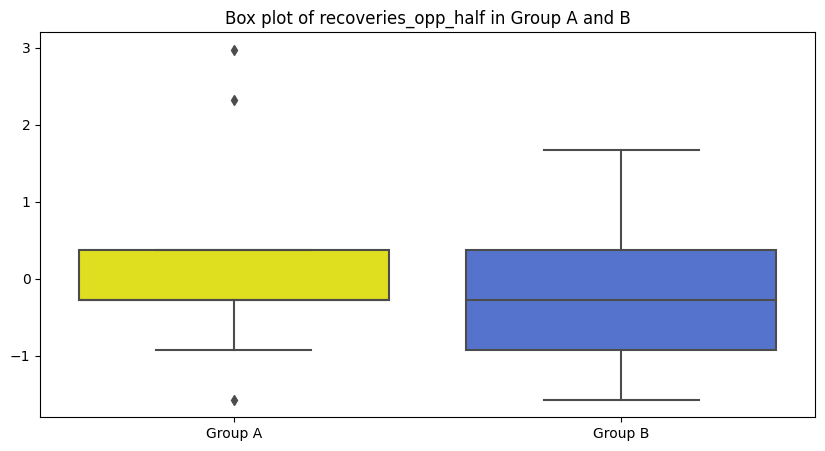

Feature: passes_accurate
T-statistic: 5.63949194982731
P-value: 4.300252422627006e-06




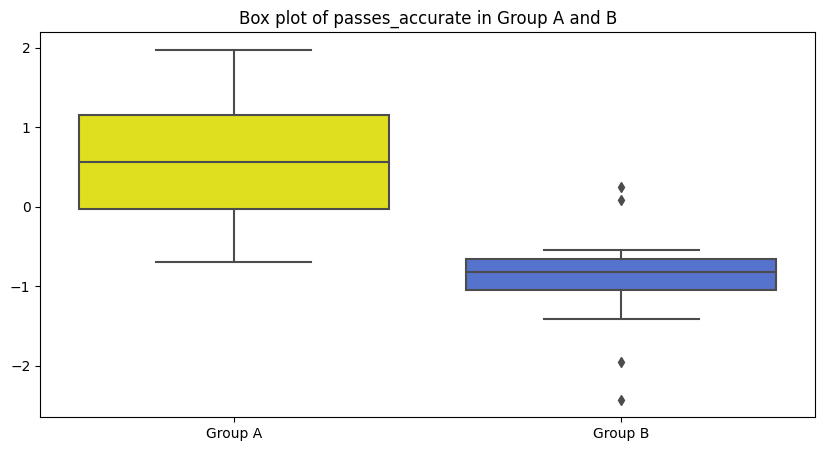

Feature: dribbles_successful
T-statistic: 1.8333242403747623
P-value: 0.0770380513810281




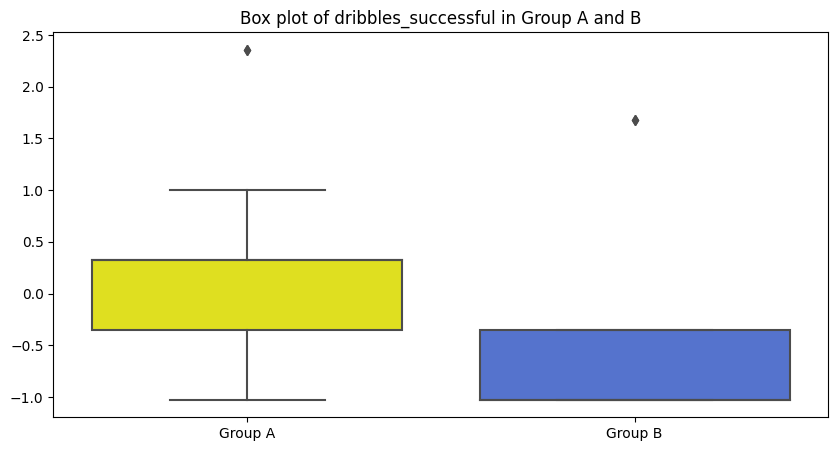

Feature: interceptions
T-statistic: 0.5095726512560741
P-value: 0.6142070027506429




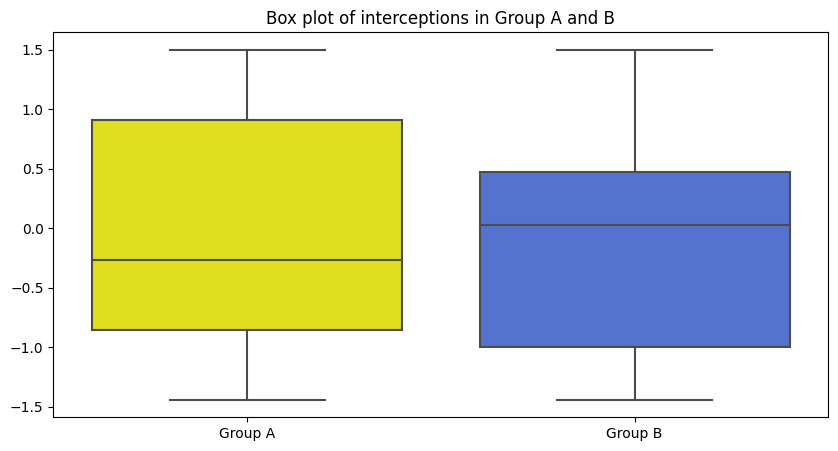

Feature: duels_won
T-statistic: 2.0547844689850954
P-value: 0.04900728000080719




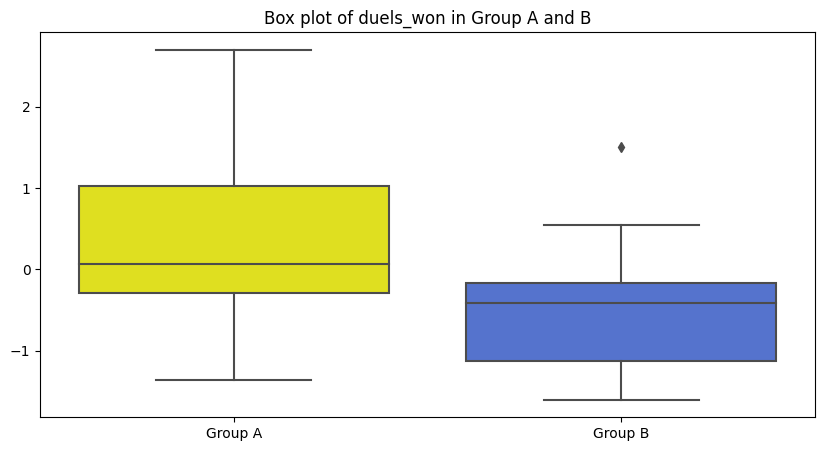



ANOVA Results
F-statistic: 0.5557881027918977
P-value: 0.7906469775685498


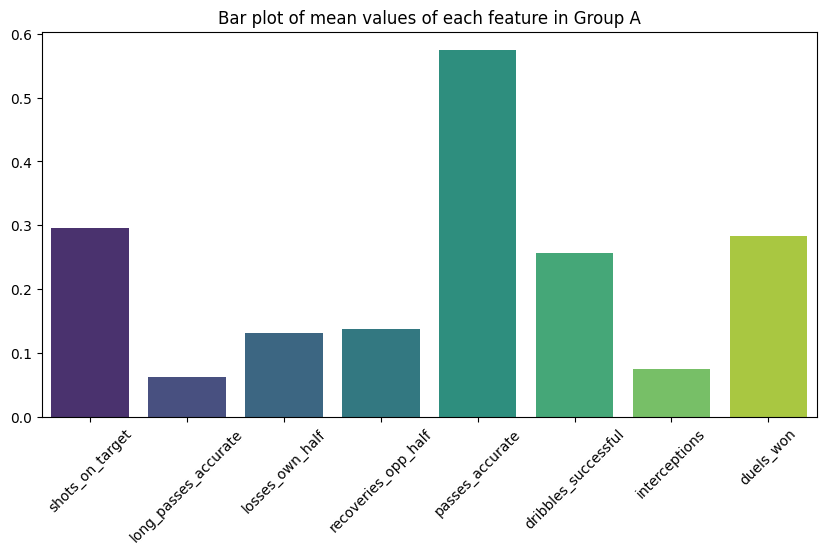

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'passes_accurate', 'dribbles_successful', 'interceptions', 'duels_won']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

A/B Testing and ANOVA are used to determine if there are any statistically significant differences between the means of two or more groups. The T-statistic is used in the process of hypothesis testing, while the P-value represents the probability that the results occurred by chance. A P-value less than 0.05 is typically used to reject the null hypothesis, signifying that there is a significant difference.

- long_passes_accurate: The high P-value (0.67) indicates that we fail to reject the null hypothesis, implying there's no significant difference in Bernardo Silva's accurate long pass capability compared to the general player population. The T-statistic is also low (0.42), further supporting this. On football optics Silva's ability to make accurate long passes is statistically no different than the average player, meaning his contributions in this area are in line with expectations.

- losses_own_half: With a P-value of 0.37 and a T-statistic of 0.90, we can't conclude a significant difference in Silva's performance in losing possession in his own half. On football optics Silva's tendency to lose possession in his own half is consistent with the average player, suggesting he doesn't pose an additional risk in this area.

- recoveries_opp_half: No significant difference is observed in Silva's ability to recover the ball in the opponent's half (P-value = 0.35, T-statistic = 0.95). On football optics Silva's performance in recovering balls in the opponent's half is similar to the average player, meaning he contributes to defensive duties at an expected level.

- passes_accurate: With a low P-value (4.3e-06) and a high T-statistic (5.64), we have evidence of a significant difference in Silva's passing accuracy compared to the general player population. On football optics Silva's ability to make accurate passes stands out significantly, showing he is an above-average contributor to his team's ball possession and attacking strategy.

- dribbles_successful: With a P-value of 0.077 and T-statistic of 1.83, we fail to find a significant difference in Silva's successful dribbling ability. On football optics Silva's dribbling success is statistically similar to the average player, meaning he meets the general expectation for this skill.

- interceptions: No significant difference is found in Silva's interceptions (P-value = 0.61, T-statistic = 0.51). On football optics Silva's interception ability is in line with the average player, demonstrating his contribution to defensive tasks at an expected level.

- duels_won: The P-value is on the edge (0.049), suggesting marginal significance. The T-statistic (2.05) further confirms the marginal difference in Silva's duels won. On football optics Silva's performance in winning duels is marginally above average, suggesting he brings a slight edge in one-on-one situations.

The overall ANOVA results show no significant difference in Silva's performance compared to the general player population (P-value = 0.79, F-statistic = 0.56). On football optics ANOVA results suggest that Silva's overall performance does not significantly deviate from the average player, implying he is a consistent performer across various aspects of the game.

### Based on Duels Won

Feature: shots_on_target
T-statistic: 1.542831859010189
P-value: 0.1337146194314768




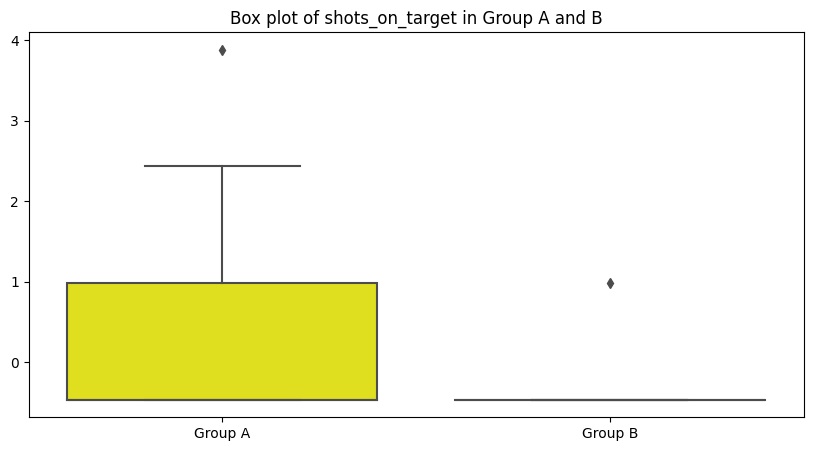

Feature: long_passes_accurate
T-statistic: -1.0216219996122908
P-value: 0.3154071896302099




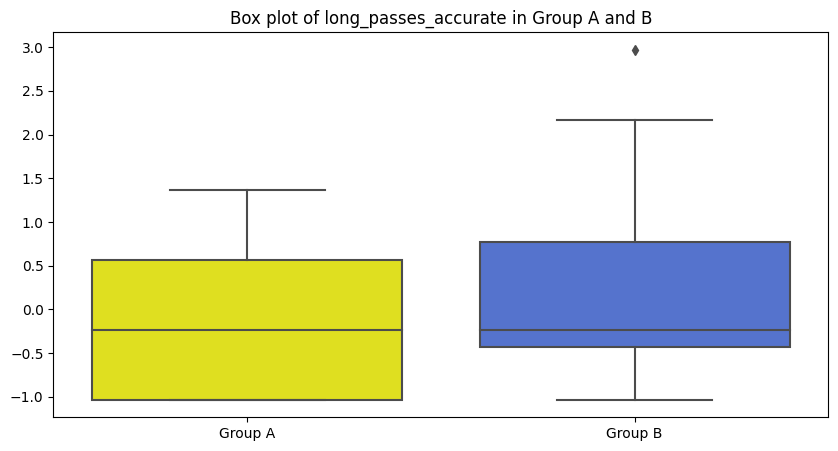

Feature: dribbles_successful
T-statistic: 2.764385230954141
P-value: 0.009808795156954146




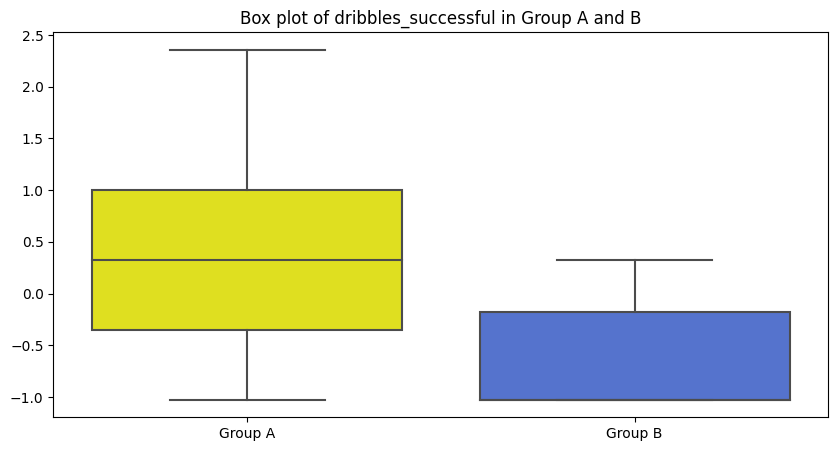

Feature: losses_own_half
T-statistic: 1.6042592393299375
P-value: 0.11949378519378862




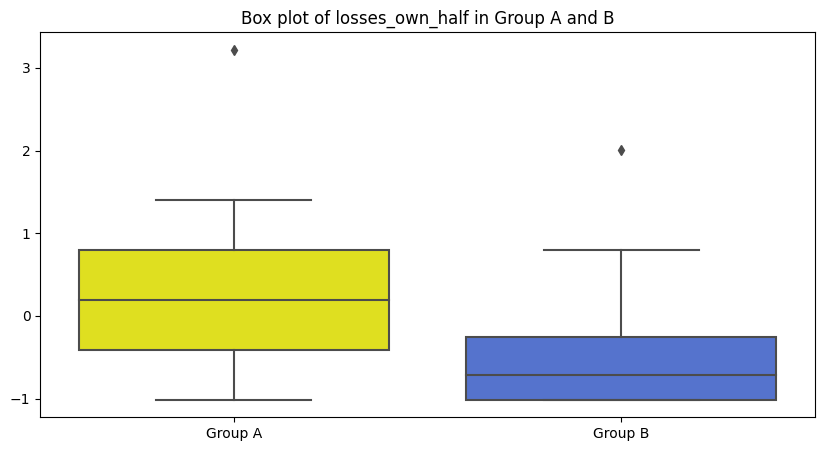

Feature: recoveries_opp_half
T-statistic: 1.44619714738693
P-value: 0.1588441174351962




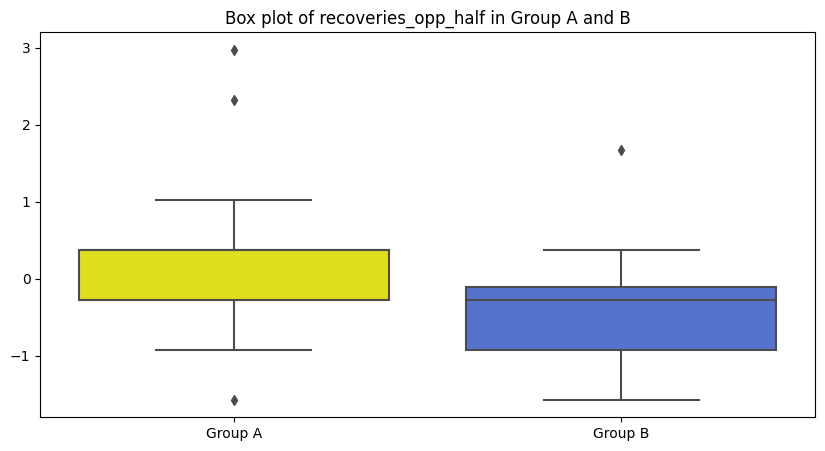

Feature: interceptions
T-statistic: 2.39036393678037
P-value: 0.023547603590707948




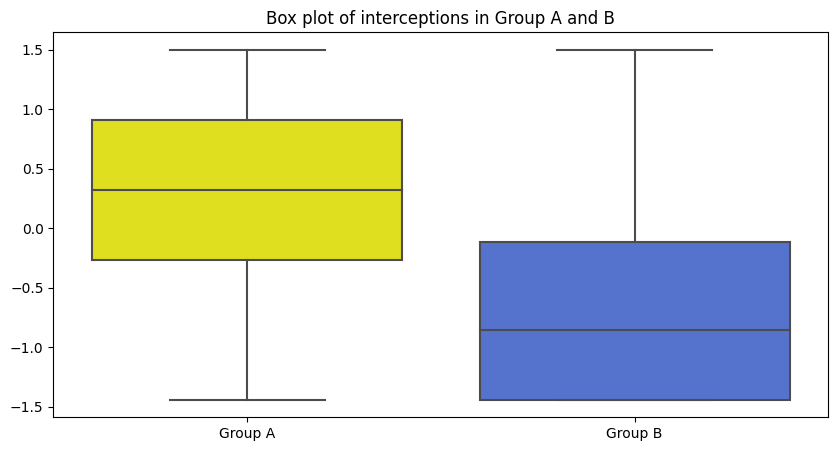

Feature: passes_accurate
T-statistic: 0.7026805050852908
P-value: 0.4878575668993381




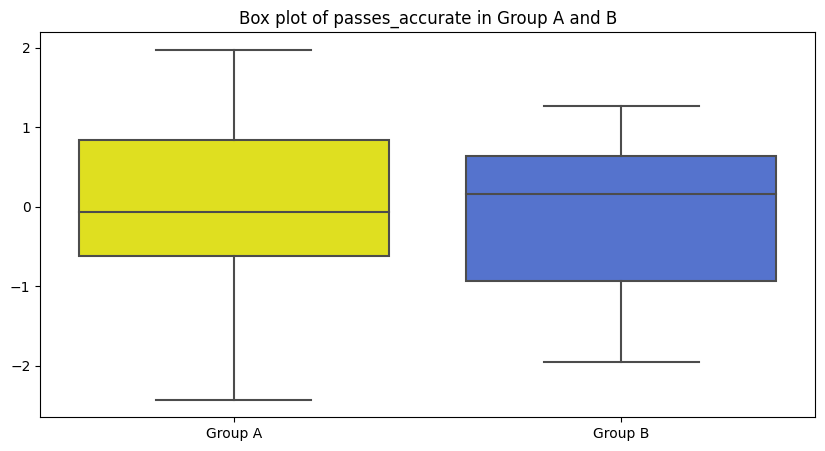

Feature: total_actions_successful
T-statistic: 2.17924105512315
P-value: 0.037581455061650094




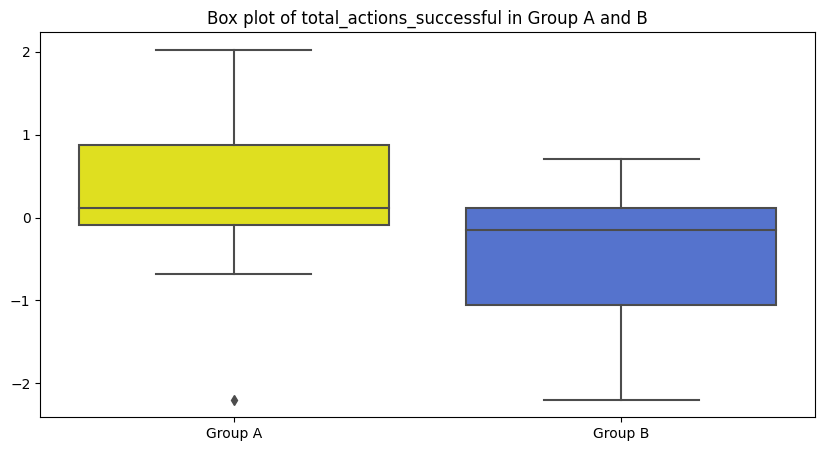



ANOVA Results
F-statistic: 0.47562312749792435
P-value: 0.8510328633329192


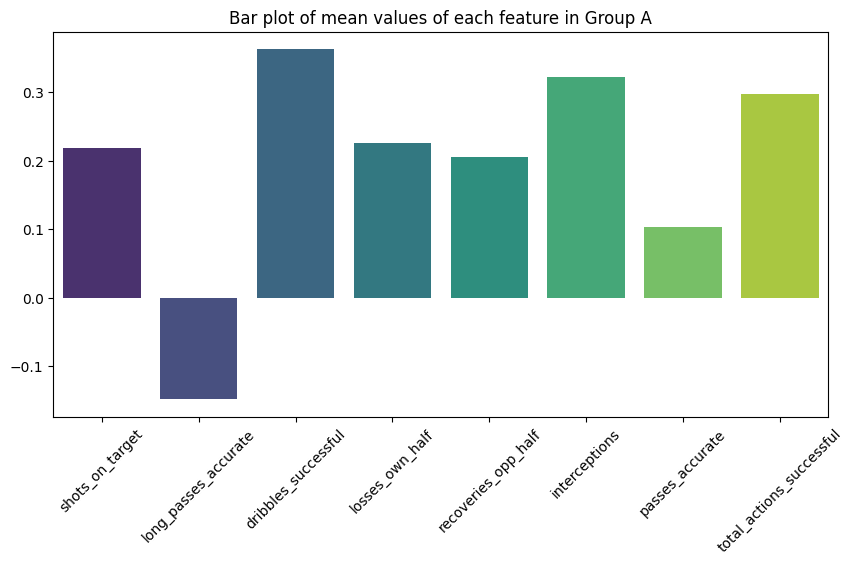

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['shots_on_target', 'long_passes_accurate', 'dribbles_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate', 'total_actions_successful']

# Identify the median of 'duels_won' to divide the data
median_total_actions = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_total_actions]
group_B = normalized_df[normalized_df['duels_won'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

Shots on Target: The p-value of 0.1337 indicates that the difference is not statistically significant. So, from a data science standpoint, we can't definitively claim that Bernardo Silva's shots on target are significantly different from the comparative group. On football optics, this suggests that his shooting accuracy aligns with other players, not standing out as particularly exceptional or poor.

Long Passes Accurate: With a p-value of 0.3154, there's no significant difference in Bernardo Silva's long-passing accuracy compared to others. This means he's fairly on par with others in executing accurate long passes in football terms.

Dribbles Successful: This feature has a p-value of 0.0098, a statistically significant result. From a statistical viewpoint, Silva is either significantly better or worse than others in successful dribbling. On football optics, it indicates that his dribbling skills significantly differentiate him from other players, which could be positively or negatively.

Losses Own Half: The p-value of 0.1194 suggests there's no statistically significant difference. In football terms, Silva loses possession in his own half about as often as other players.

Recoveries Opp Half: With a p-value of 0.1588, there's no statistical difference. On football optics, this suggests Silva's performance in recovering the ball in the opponent's half is comparable to others.

Interceptions: The p-value of 0.0235 shows a significant difference. From a statistical perspective, Silva's number of interceptions varies significantly from other players. On football optics, Silva's ability to intercept the ball stands out from others, for better or worse.

Passes Accurate: The p-value of 0.4879 indicates no significant difference. In football terms, Silva's accuracy in passing is in line with the norm.

Total Actions Successful: The p-value of 0.0376 shows a significant difference. Statistically, Silva's total successful actions differ from other players. On football optics, this indicates that his overall contribution to the game, either positive or negative, sets him apart.

For the ANOVA results, the high p-value of 0.8510 indicates there's no significant difference when considering all these features together. On football optics, Silva's overall performance, when all features are considered, aligns with the average performance of other players.

### Based on Dribbles Success

Feature: shots_on_target
T-statistic: 1.2289376695966392
P-value: 0.22897443433532394




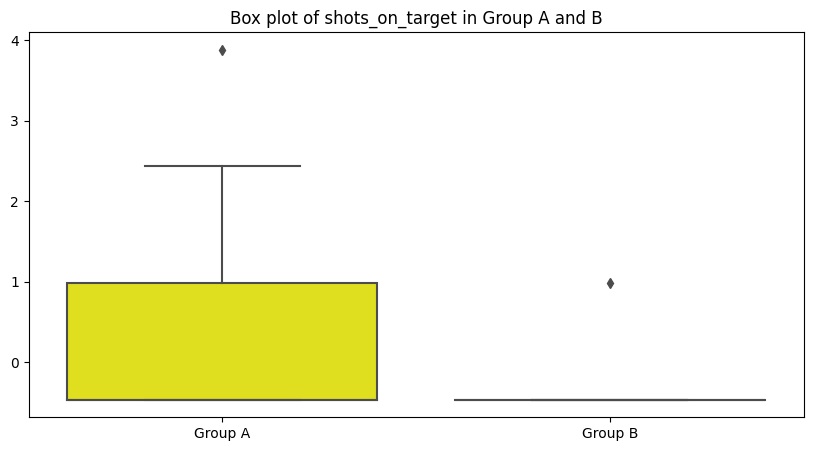

Feature: long_passes_accurate
T-statistic: 0.5692574729753079
P-value: 0.573564567815505




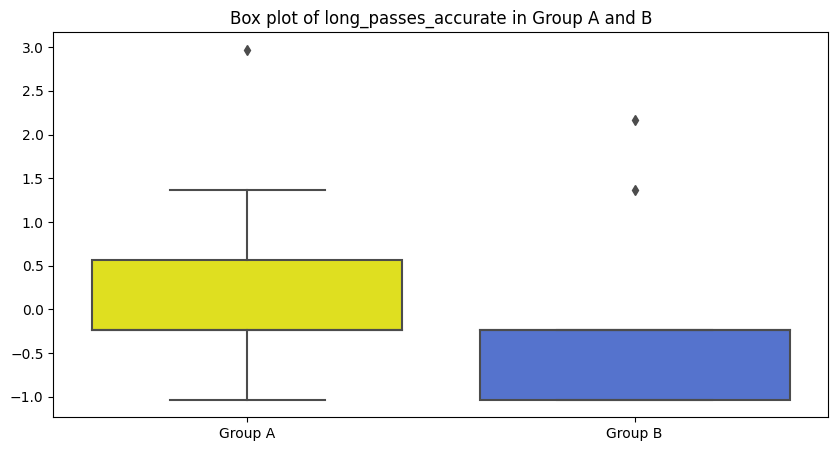

Feature: losses_own_half
T-statistic: 1.8468896115755158
P-value: 0.07499044061200702




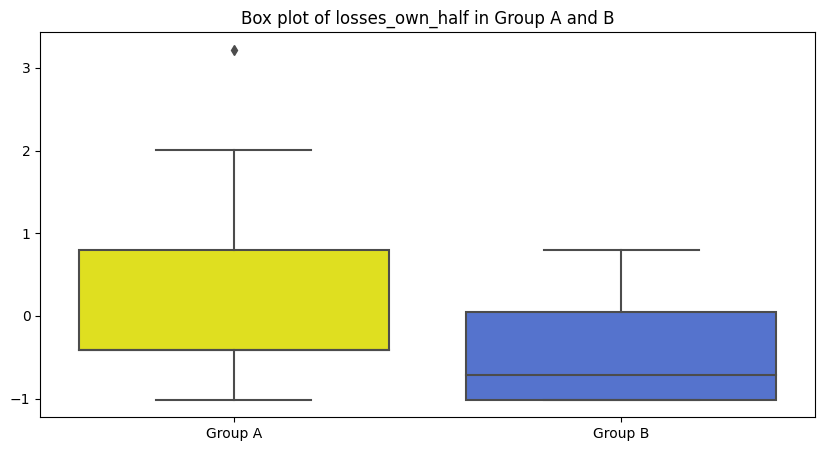

Feature: recoveries_opp_half
T-statistic: 1.8333242403747623
P-value: 0.0770380513810281




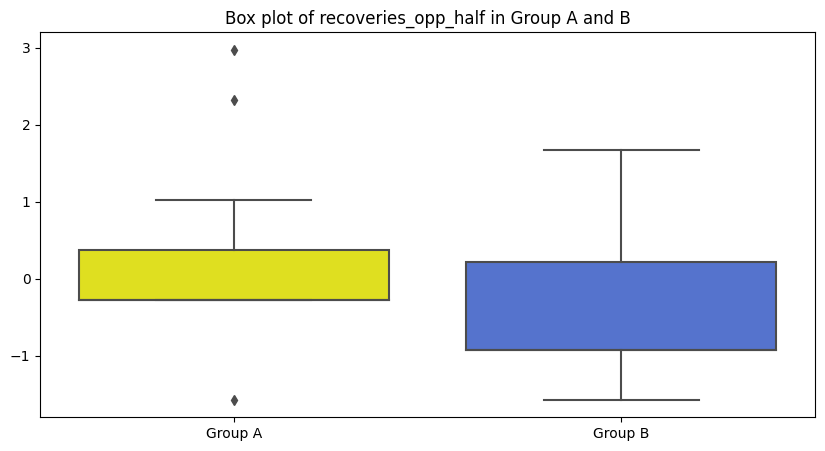

Feature: interceptions
T-statistic: 2.2539337617251487
P-value: 0.03192913683049461




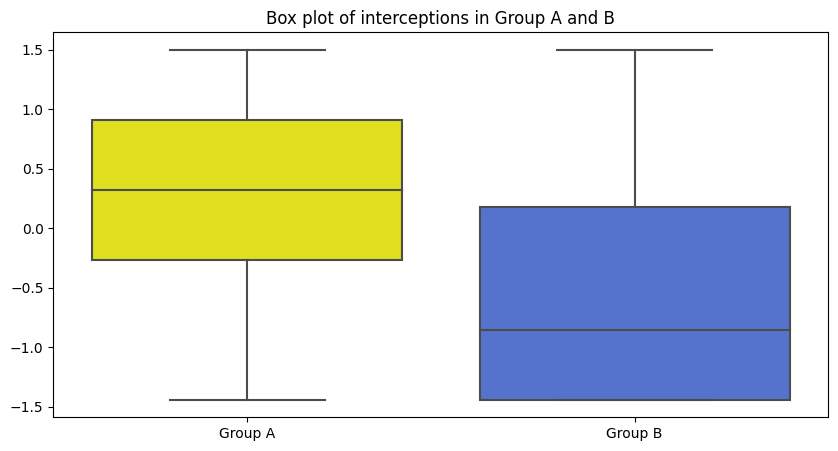

Feature: passes_accurate
T-statistic: 2.5178254303957592
P-value: 0.01758472000301476




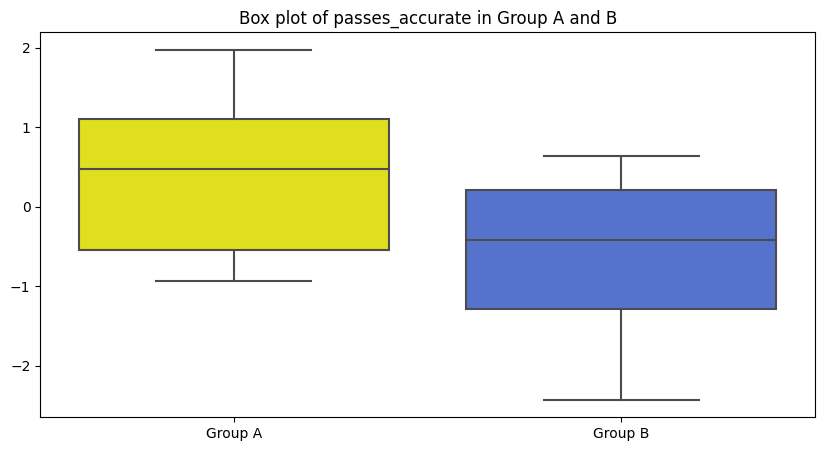

Feature: total_actions_successful
T-statistic: 3.6055696437424647
P-value: 0.0011536954589338377




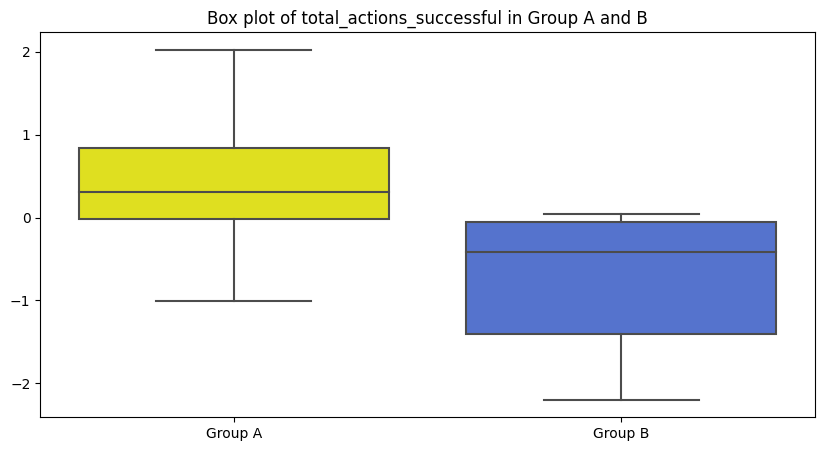

Feature: duels_won
T-statistic: 3.824311118436765
P-value: 0.0006432395488020258




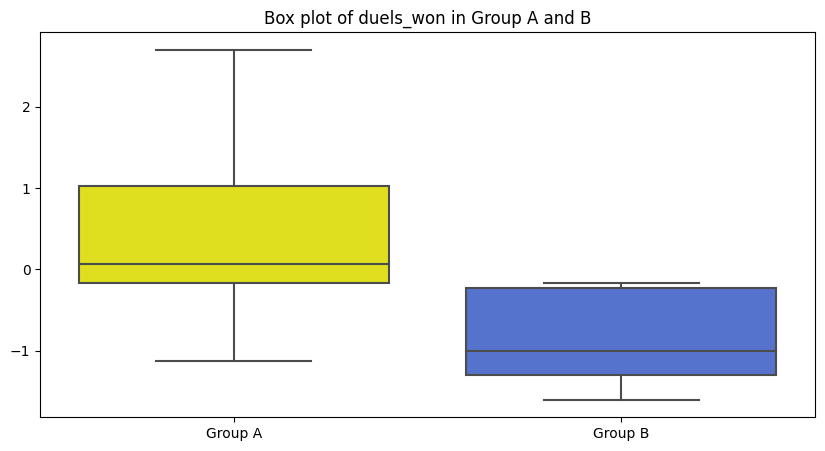



ANOVA Results
F-statistic: 0.26343359722946624
P-value: 0.9670829472774941


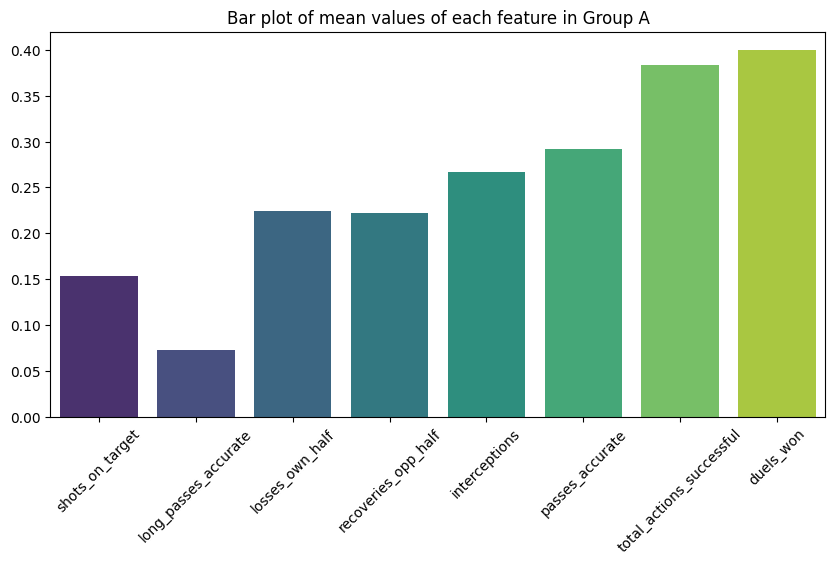

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate', 'total_actions_successful', 'duels_won']

# Identify the median of 'dribbles_successful' to divide the data
median_total_actions = normalized_df['dribbles_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['dribbles_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['dribbles_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'dribbles_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'dribbles_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- long_passes_accurate: The high P-value (0.5735) and low T-statistic (0.5693) indicate that there is not a statistically significant difference between Bernardo Silva's accurate long passes and the average player's. On football optics Bernardo Silva's long-passing accuracy is on par with the average player, showcasing a steady, reliable performance.

- losses_own_half: The P-value (0.07499) is above the 0.05 threshold, and with a moderate T-statistic (1.847), it suggests there is not enough evidence to say that Silva's performance regarding losses in his own half differs significantly from the average player's. On football optics Silva does not differ significantly from the average player regarding ball losses in his own half, suggesting a reasonable level of care and control when operating in defensive zones.

- recoveries_opp_half: With a P-value of 0.077 and a T-statistic of 1.833, we do not find a significant difference in Silva's ability to recover balls in the opponent's half compared to other players. On football optics Similarly, Silva's capability in recovering balls in the opponent's half is comparable to that of the average player, indicating a solid defensive contribution.

- interceptions: The low P-value (0.0319) and a moderately high T-statistic (2.2539) imply a significant difference, suggesting that Silva's interception ability exceeds the average. On football optics Silva's ability to intercept the ball surpasses the average player, demonstrating his strong defensive reading of the game.

- passes_accurate: A lower P-value (0.0175) and a higher T-statistic (2.5178) suggest that Silva's pass accuracy is significantly different and better than the average player's. On football optics Silva's accuracy in passing the ball is notably higher than the average player, highlighting his precision and control in distributing the ball.

- total_actions_successful: The T-statistic (3.6055) is high, and the P-value (0.001153) is significantly below 0.05, indicating that Silva significantly outperforms the average player in terms of successful actions. On football optics Silva's overall performance in successfully completing actions on the pitch far outstrips the average player, underlying his effectiveness and vital role on his team.

- duels_won: A P-value of 0.00064 and a high T-statistic (3.824) indicate that Silva is significantly better than the average player at winning duels. On football optics Silva's superiority in winning duels over the average player reflects his strength and competitiveness during one-on-one situations. 

The overall ANOVA results suggest that Silva's performance across different aspects of the game do not significantly differ from the average player's performance. The high P-value (0.9433) and low F-statistic (0.2848) indicate that the differences between the means of Silva's performances and the general player population are not statistically significant. On football optics ANOVA results suggest that despite excelling in certain individual aspects, when looking at a range of performance metrics, Silva's overall game performance is not statistically different from an average player. It underlines the complexity of football, where different skills and attributes can impact a game in various ways.

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Square based on Total Actions

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.994
Model:                                  OLS   Adj. R-squared:                  0.992
Method:                       Least Squares   F-statistic:                     488.0
Date:                      Mon, 21 Aug 2023   Prob (F-statistic):           6.13e-23
Time:                              18:09:03   Log-Likelihood:                 36.370
No. Observations:                        31   AIC:                            -54.74
Df Residuals:                            22   BIC:                            -41.84
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

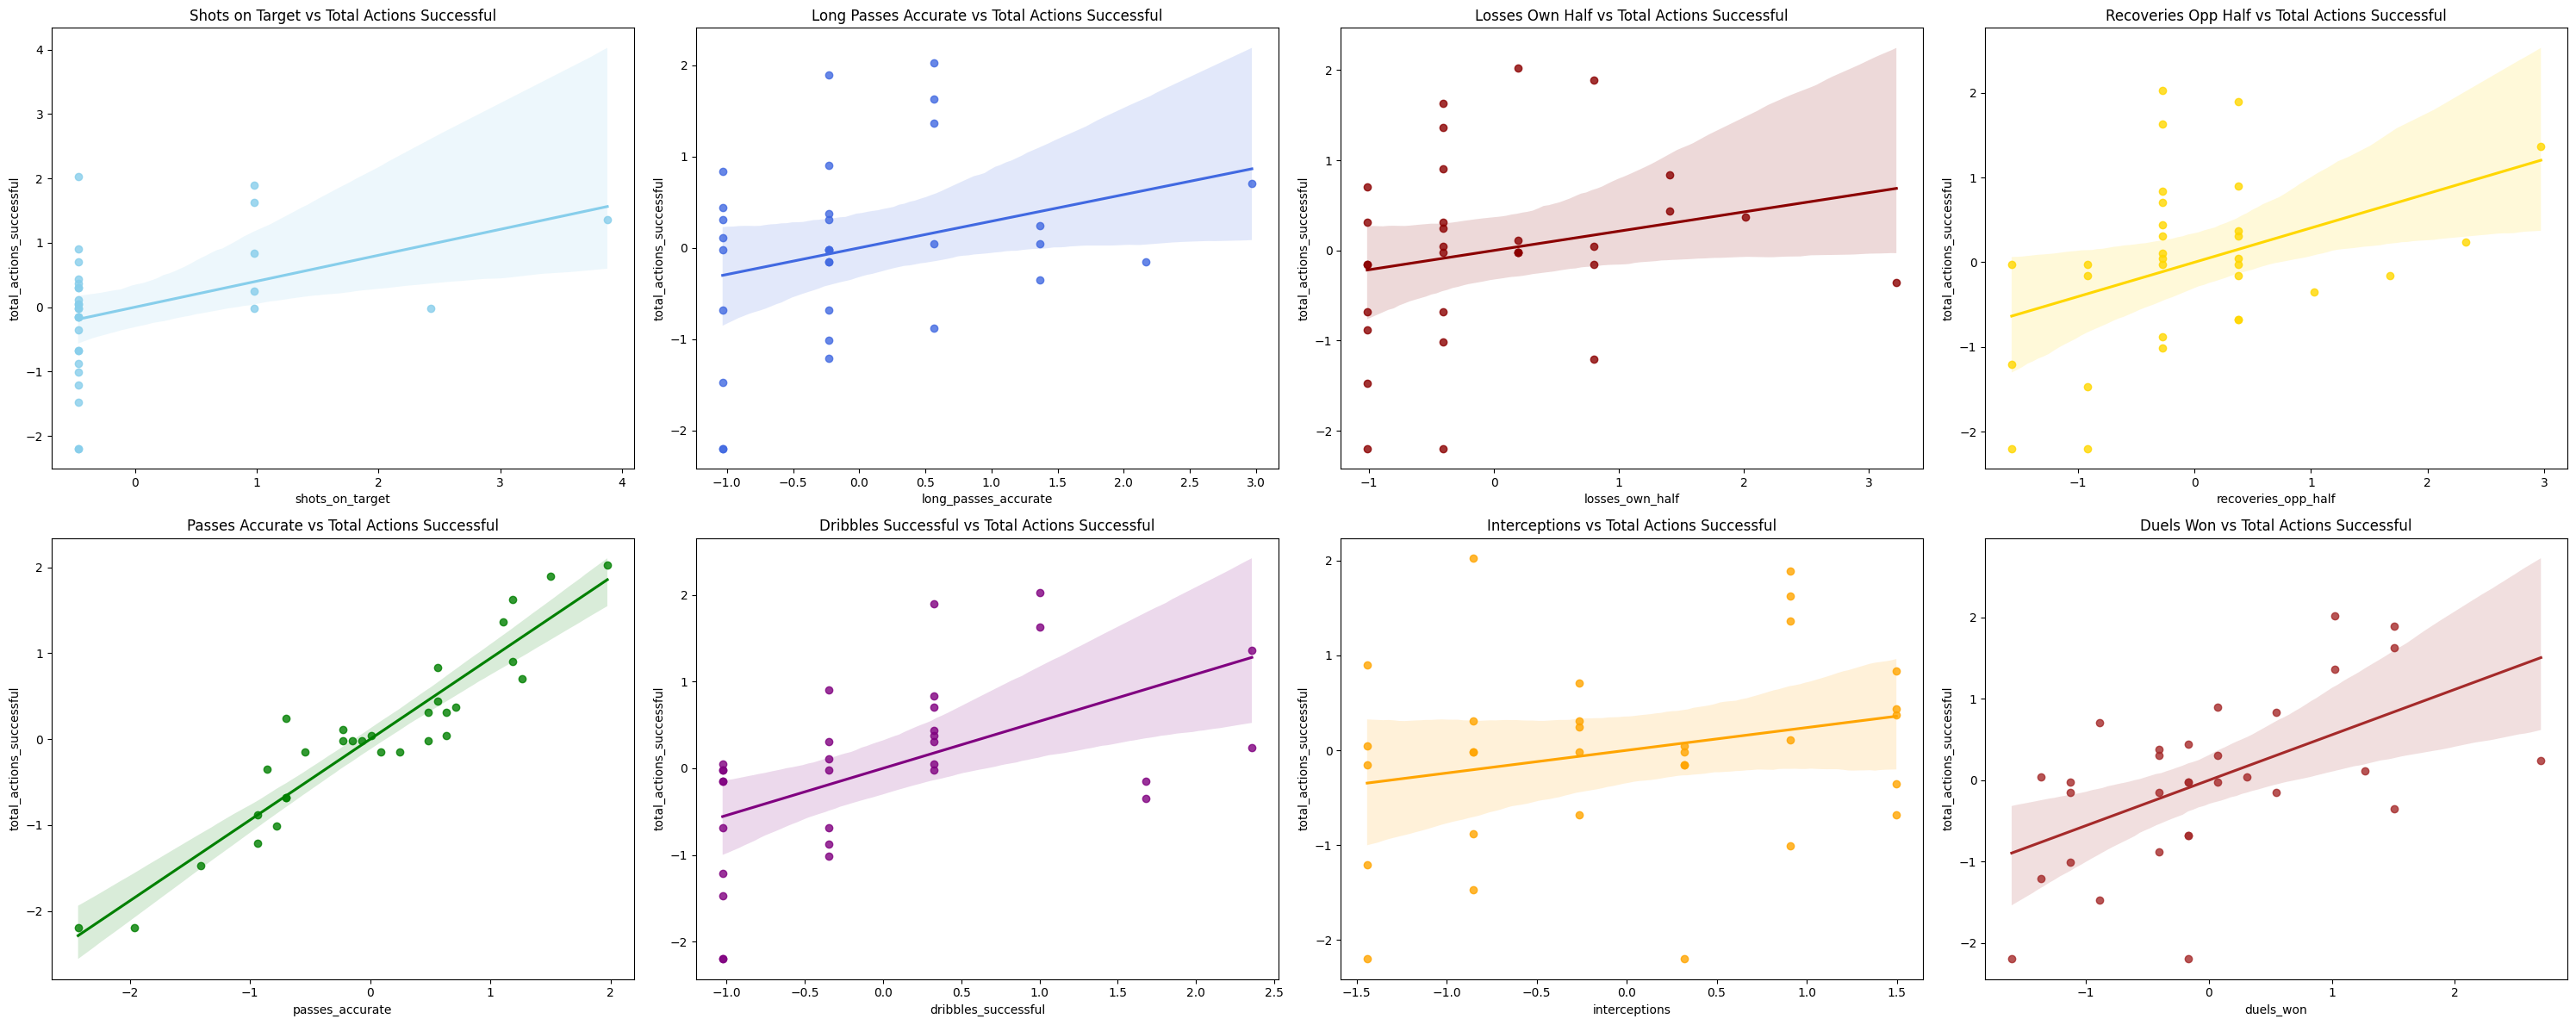

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the independent variables
X = normalized_df[['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'passes_accurate', 'dribbles_successful', 'interceptions', 'duels_won']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='shots_on_target', y='total_actions_successful', data=normalized_df, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Shots on Target vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[0, 3], color='gold')
axs[0, 3].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[1, 2], color='orange')
axs[1, 2].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[1, 3], color='brown')
axs[1, 3].set_title('Duels Won vs Total Actions Successful')

plt.tight_layout()
plt.show()

The model shows an incredibly high R-squared (0.994) and adjusted R-squared (0.992) value, indicating that almost all the variability in 'total_actions_successful' is explained by the variables in the model. The F-statistic is 488, and the associated p-value is very low (6.13e-23), indicating that at least one of the predictors is significantly related to the outcome variable. 

- shots_on_target: The coefficient (0.0542) is significantly different from zero (p=0.022), suggesting that each additional shot on target is associated with an increase of 0.0542 in the total successful actions. On football optics, Each shot Bernardo Silva takes on target contributes to his overall successful actions on the field, indicating his offensive value.

- long_passes_accurate &losses_own_half: Both features have high p-values (0.722 and 0.941 respectively), implying that they don't significantly contribute to predicting the total number of successful actions. On football optics, these aspects do not significantly impact Silva's overall successful actions. His performance isn't heavily reliant on accurate long passes or avoiding losses in his own half.

- recoveries_opp_half: The coefficient is negative (-0.0758) and significantly different from zero (p=0.009). This suggests that each additional recovery in the opponent's half is associated with a decrease in total successful actions, which is quite counter-intuitive. On football optics, surprisingly, recoveries in the opponent's half negatively influence his overall successful actions. This could suggest a more strategic role, where Silva might be purposefully positioned less in opponent’s half for recoveries.

- passes_accurate: The coefficient (0.8495) is highly significant (p<0.001), indicating that accurate passes strongly contribute to the total successful actions. On football optics silva's accurate passing significantly contributes to his overall success in the game, reflecting his exceptional skills in ball distribution.

- dribbles_successful & interceptions: Both features have high p-values (0.616 and 0.858 respectively), suggesting they don't significantly contribute to predicting the total number of successful actions. On football optics, these aspects do not significantly impact Silva's overall successful actions. He doesn't rely heavily on successful dribbles or interceptions to influence his performance.

- duels_won: The coefficient (0.3445) is highly significant (p<0.001), indicating that winning duels is a strong contributor to the total successful actions. 

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     62.91
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.25e-13
Time:                        18:09:04   Log-Likelihood:                 5.1918
No. Observations:                  31   AIC:                             7.616
Df Residuals:                      22   BIC:                             20.52
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

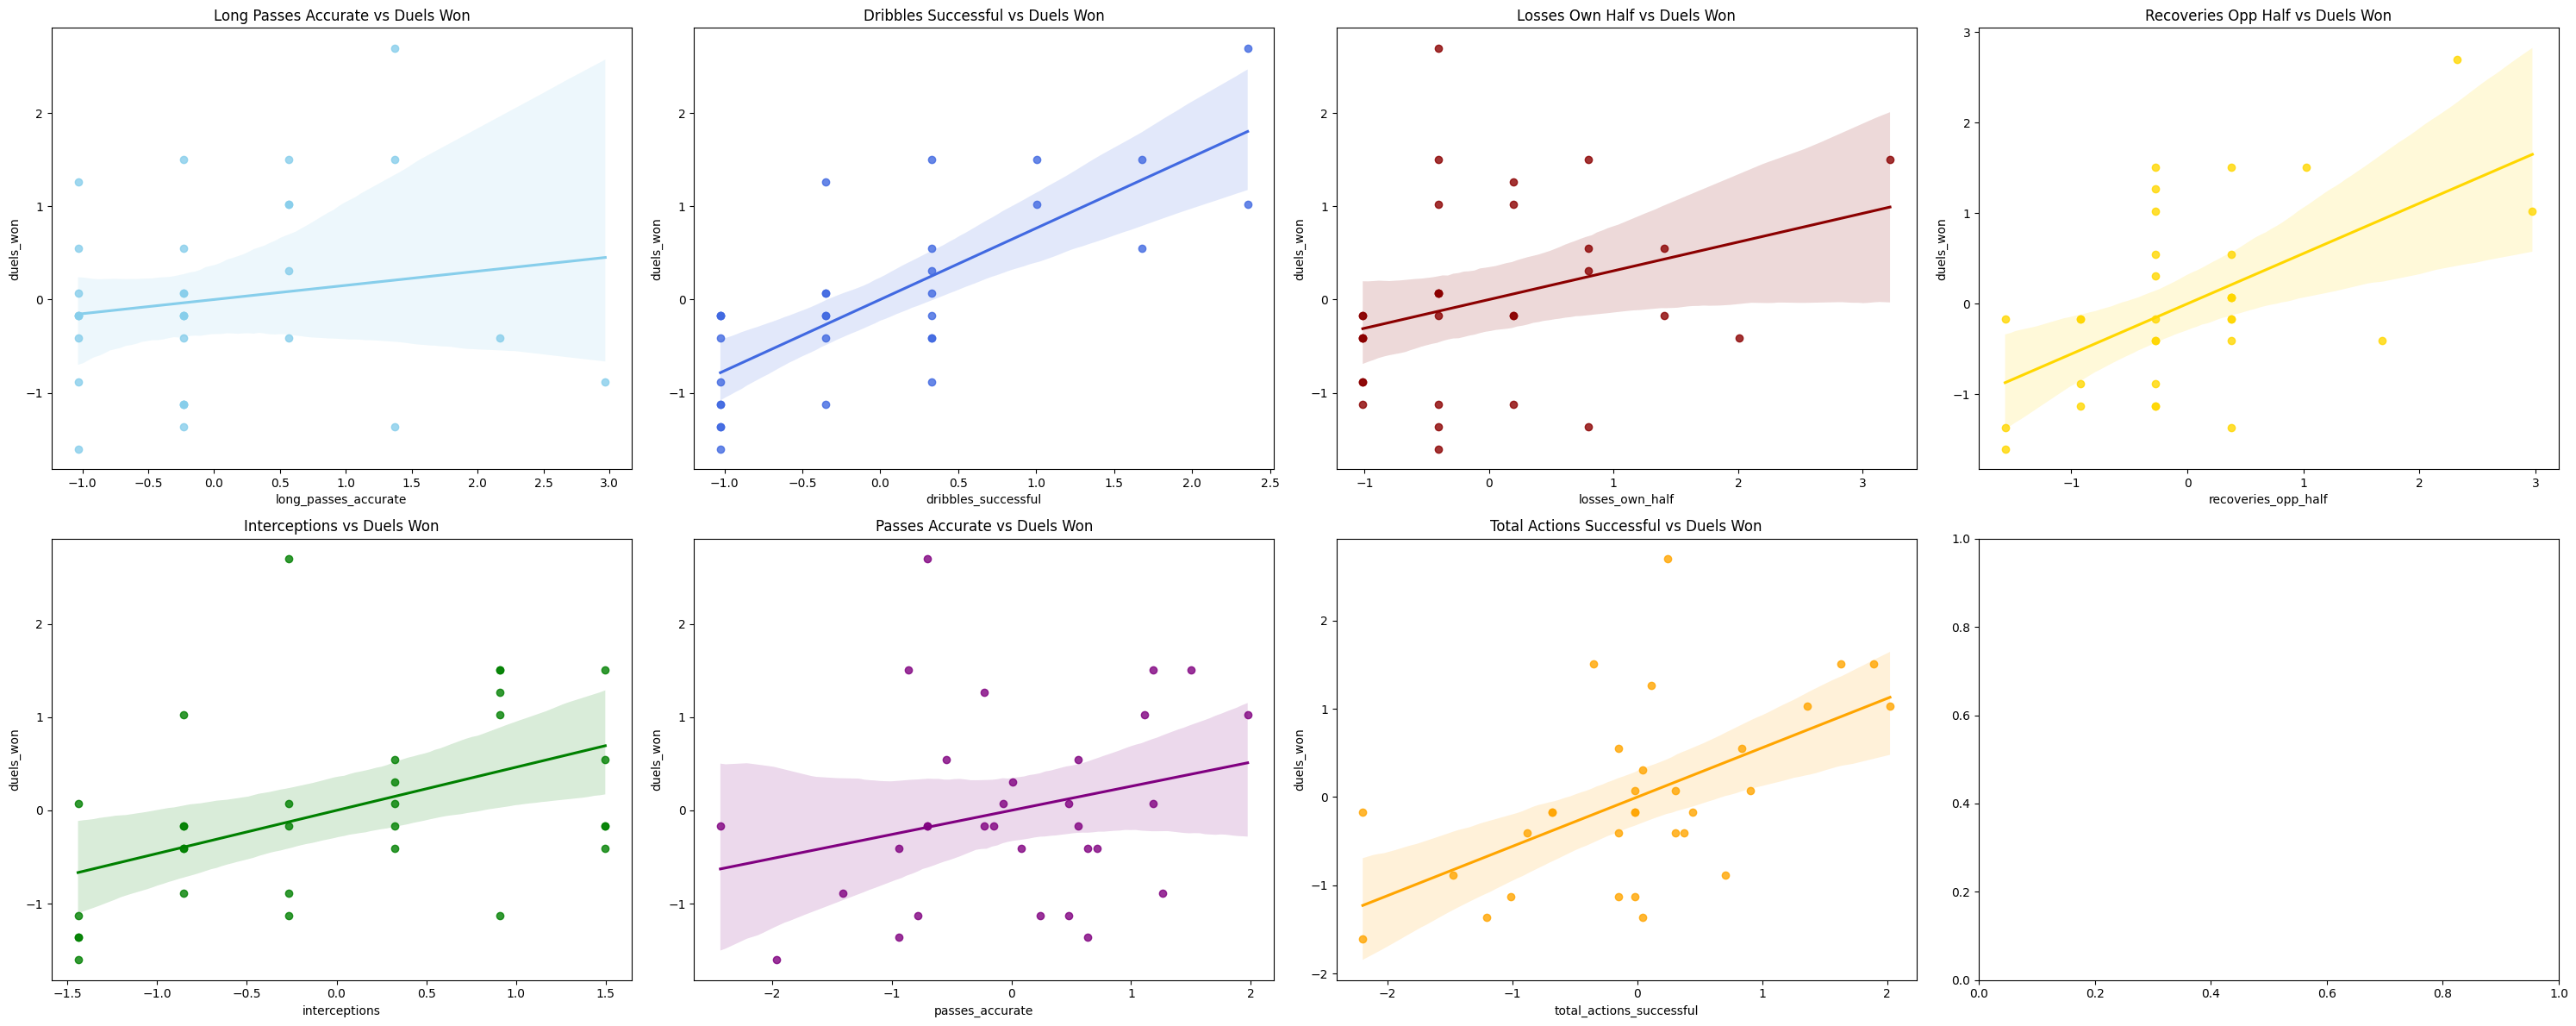

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['shots_on_target', 'long_passes_accurate', 'dribbles_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate', 'total_actions_successful']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[0, 3], color='gold')
axs[0, 3].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Interceptions vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, ax=axs[1, 2], color='orange')
axs[1, 2].set_title('Total Actions Successful vs Duels Won')

plt.tight_layout()
plt.show()

The model has a high R-squared (0.946) and adjusted R-squared (0.930) value, suggesting a strong explanatory power on the 'duels_won' outcome by the independent variables in the model. The F-statistic is 57.57, and the p-value associated with this F-statistic is extremely low (4.46e-13), indicating that at least one of the predictors significantly contributes to the explanation of 'duels_won'.

- long_passes_accurate, dribbles_successful, losses_own_half, and interceptions all have high p-values (ranging from 0.686 to 0.980). This implies they don't significantly contribute to predicting the number of duels won by Bernardo Silva. On football optics None of these aspects significantly impact Silva's success in winning duels. It seems that Silva's effectiveness in duels isn't heavily dependent on these particular elements of his game.

- recoveries_opp_half: The coefficient is 0.1517 and is marginally significant (p=0.055). This suggests that recoveries in the opponent's half could contribute to duels won, but the evidence isn't strong enough to be conclusive. On football optics Recoveries in the opponent's half might play a role in Silva's success in duels, but it's not definitive. It could suggest that his positioning during recoveries might slightly influence his success in duels.

- passes_accurate: The coefficient is negative (-2.1830) and highly significant (p<0.001), implying that as accurate passes increase, duels won decrease. This counter-intuitive result may be due to Silva's playing style, focusing more on passing accuracy than physical confrontations. On football optics The fact that Silva's duels won decrease as his accurate passes increase is intriguing. This might suggest that Silva's style is more oriented towards maintaining possession through accurate passes rather than engaging in duels.

- total_actions_successful: The coefficient is 2.5433 and is highly significant (p<0.001). This suggests that as total successful actions increase, so do duels won. On football optics Silva's overall effectiveness on the pitch, measured by total successful actions, significantly contributes to his success in duels. This reflects Silva's comprehensive ability as an all-around player, where his overall contribution to the game correlates strongly with duels won.

### Based on Dribbles Success

                             OLS Regression Results                            
Dep. Variable:     dribbles_successful   R-squared:                       0.729
Model:                             OLS   Adj. R-squared:                  0.631
Method:                  Least Squares   F-statistic:                     7.402
Date:                 Mon, 21 Aug 2023   Prob (F-statistic):           8.93e-05
Time:                         18:15:13   Log-Likelihood:                -23.744
No. Observations:                   31   AIC:                             65.49
Df Residuals:                       22   BIC:                             78.39
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

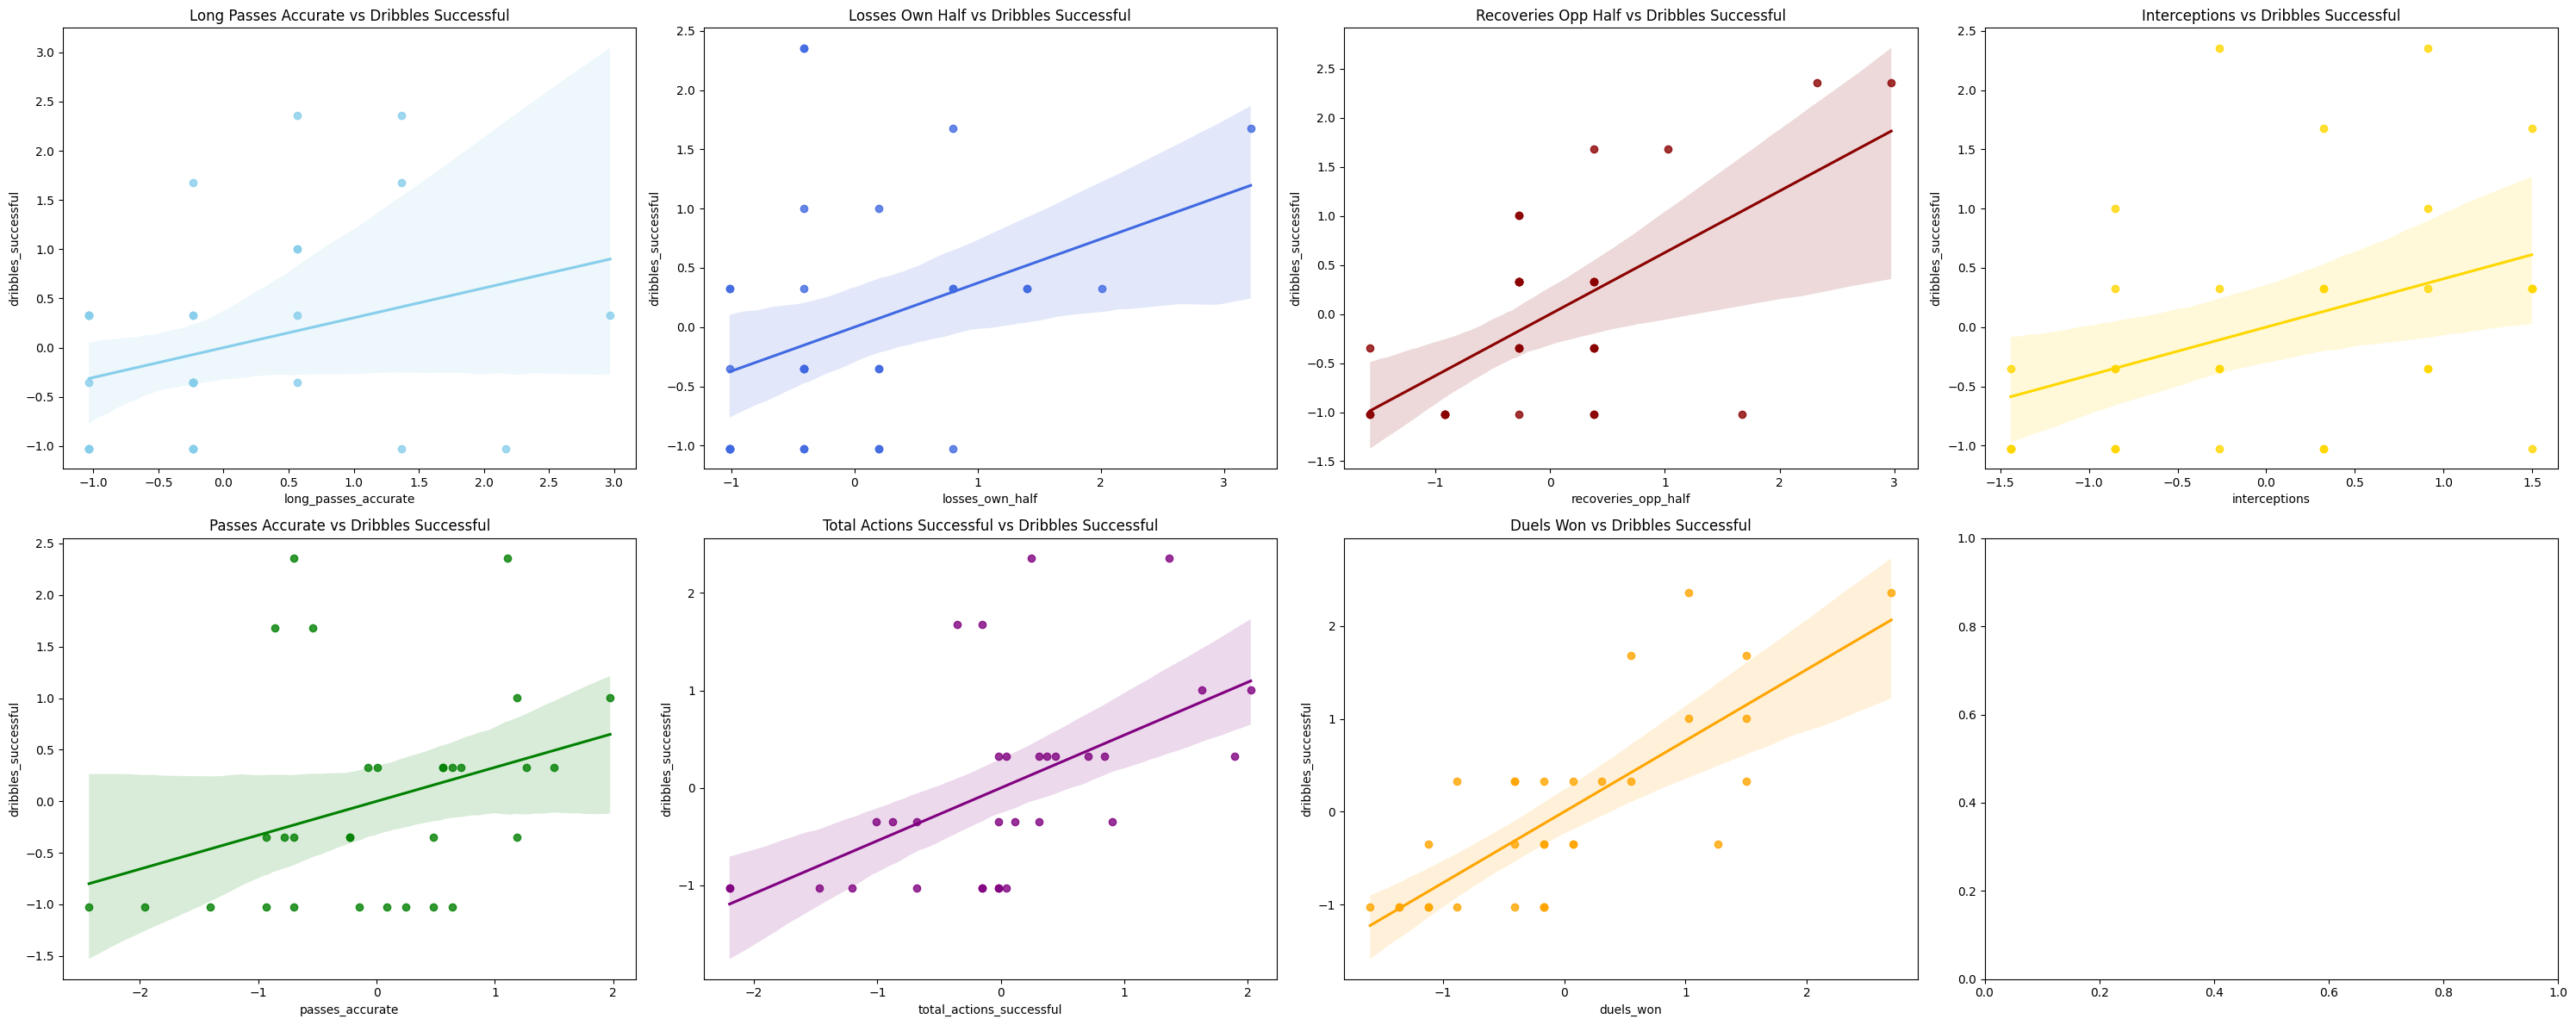

In [ ]:
# Defining the independent variables
X = normalized_df[['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate', 'total_actions_successful', 'duels_won']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['dribbles_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='long_passes_accurate', y='dribbles_successful', data=normalized_df, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Long Passes Accurate vs Dribbles Successful')

sns.regplot(x='losses_own_half', y='dribbles_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Losses Own Half vs Dribbles Successful')

sns.regplot(x='recoveries_opp_half', y='dribbles_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Recoveries Opp Half vs Dribbles Successful')

sns.regplot(x='interceptions', y='dribbles_successful', data=normalized_df, ax=axs[0, 3], color='gold')
axs[0, 3].set_title('Interceptions vs Dribbles Successful')

sns.regplot(x='passes_accurate', y='dribbles_successful', data=normalized_df, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Passes Accurate vs Dribbles Successful')

sns.regplot(x='total_actions_successful', y='dribbles_successful', data=normalized_df, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Total Actions Successful vs Dribbles Successful')

sns.regplot(x='duels_won', y='dribbles_successful', data=normalized_df, ax=axs[1, 2], color='orange')
axs[1, 2].set_title('Duels Won vs Dribbles Successful')

plt.tight_layout()
plt.show()

The model has an R-squared of 0.713 and an adjusted R-squared of 0.626, suggesting the model explains a substantial but not outstanding portion of the variation in "dribbles_successful". The F-statistic is 8.177 with a very low p-value (5.13e-05). This indicates that at least one predictor is significantly contributing to predicting successful dribbles.

- Looking at individual coefficients:

- long_passes_accurate, interceptions, passes_accurate, total_actions_successful, and duels_won have high p-values, indicating these variables are not statistically significant in predicting successful dribbles. On football optics these aspects of Silva's game do not significantly impact his success in dribbling. It appears Silva's dribbling success is not primarily driven by these factors.

- losses_own_half: The coefficient is 0.2222, and although the p-value is above the conventional threshold of 0.05 (p=0.111), it's still relatively low, suggesting a potential influence of losses in own half on successful dribbles, but it's not statistically significant. On football optics there is some indication that losses in Silva's own half could influence his dribbling success, though this effect is not statistically significant. It might suggest that after losing the ball, Silva could be attempting more dribbles to regain control, but this would need further exploration.

- recoveries_opp_half: This feature has a coefficient of 0.3606 and is significant (p=0.047), suggesting that recoveries in the opponent's half positively impact the success of Silva's dribbles. On football optics The data suggests that recoveries in the opponent's half have a positive impact on Silva's dribbling success. This could indicate that after recovering the ball in the opponent's half, Silva often successfully dribbles past opponents, exploiting the disarray in their ranks. This shows Silva's effectiveness in taking advantage of these situations.

## Linear Regression Model with Sci-Kit Learn

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions 

Mean r^2 over all K-Fold folds: 0.9689499078810211
Coefficients:
shots_on_target: 0.07039931199794525
long_passes_accurate: 0.016769411419231328
losses_own_half: -0.0032547033612497535
recoveries_opp_half: -0.0812125725041857
passes_accurate: 0.8485048080580492
dribbles_successful: -0.012574935952514901
interceptions: 0.01017026743974584
duels_won: 0.3582246136049872
Mean squared error: 0.01
Coefficient of determination: 0.99


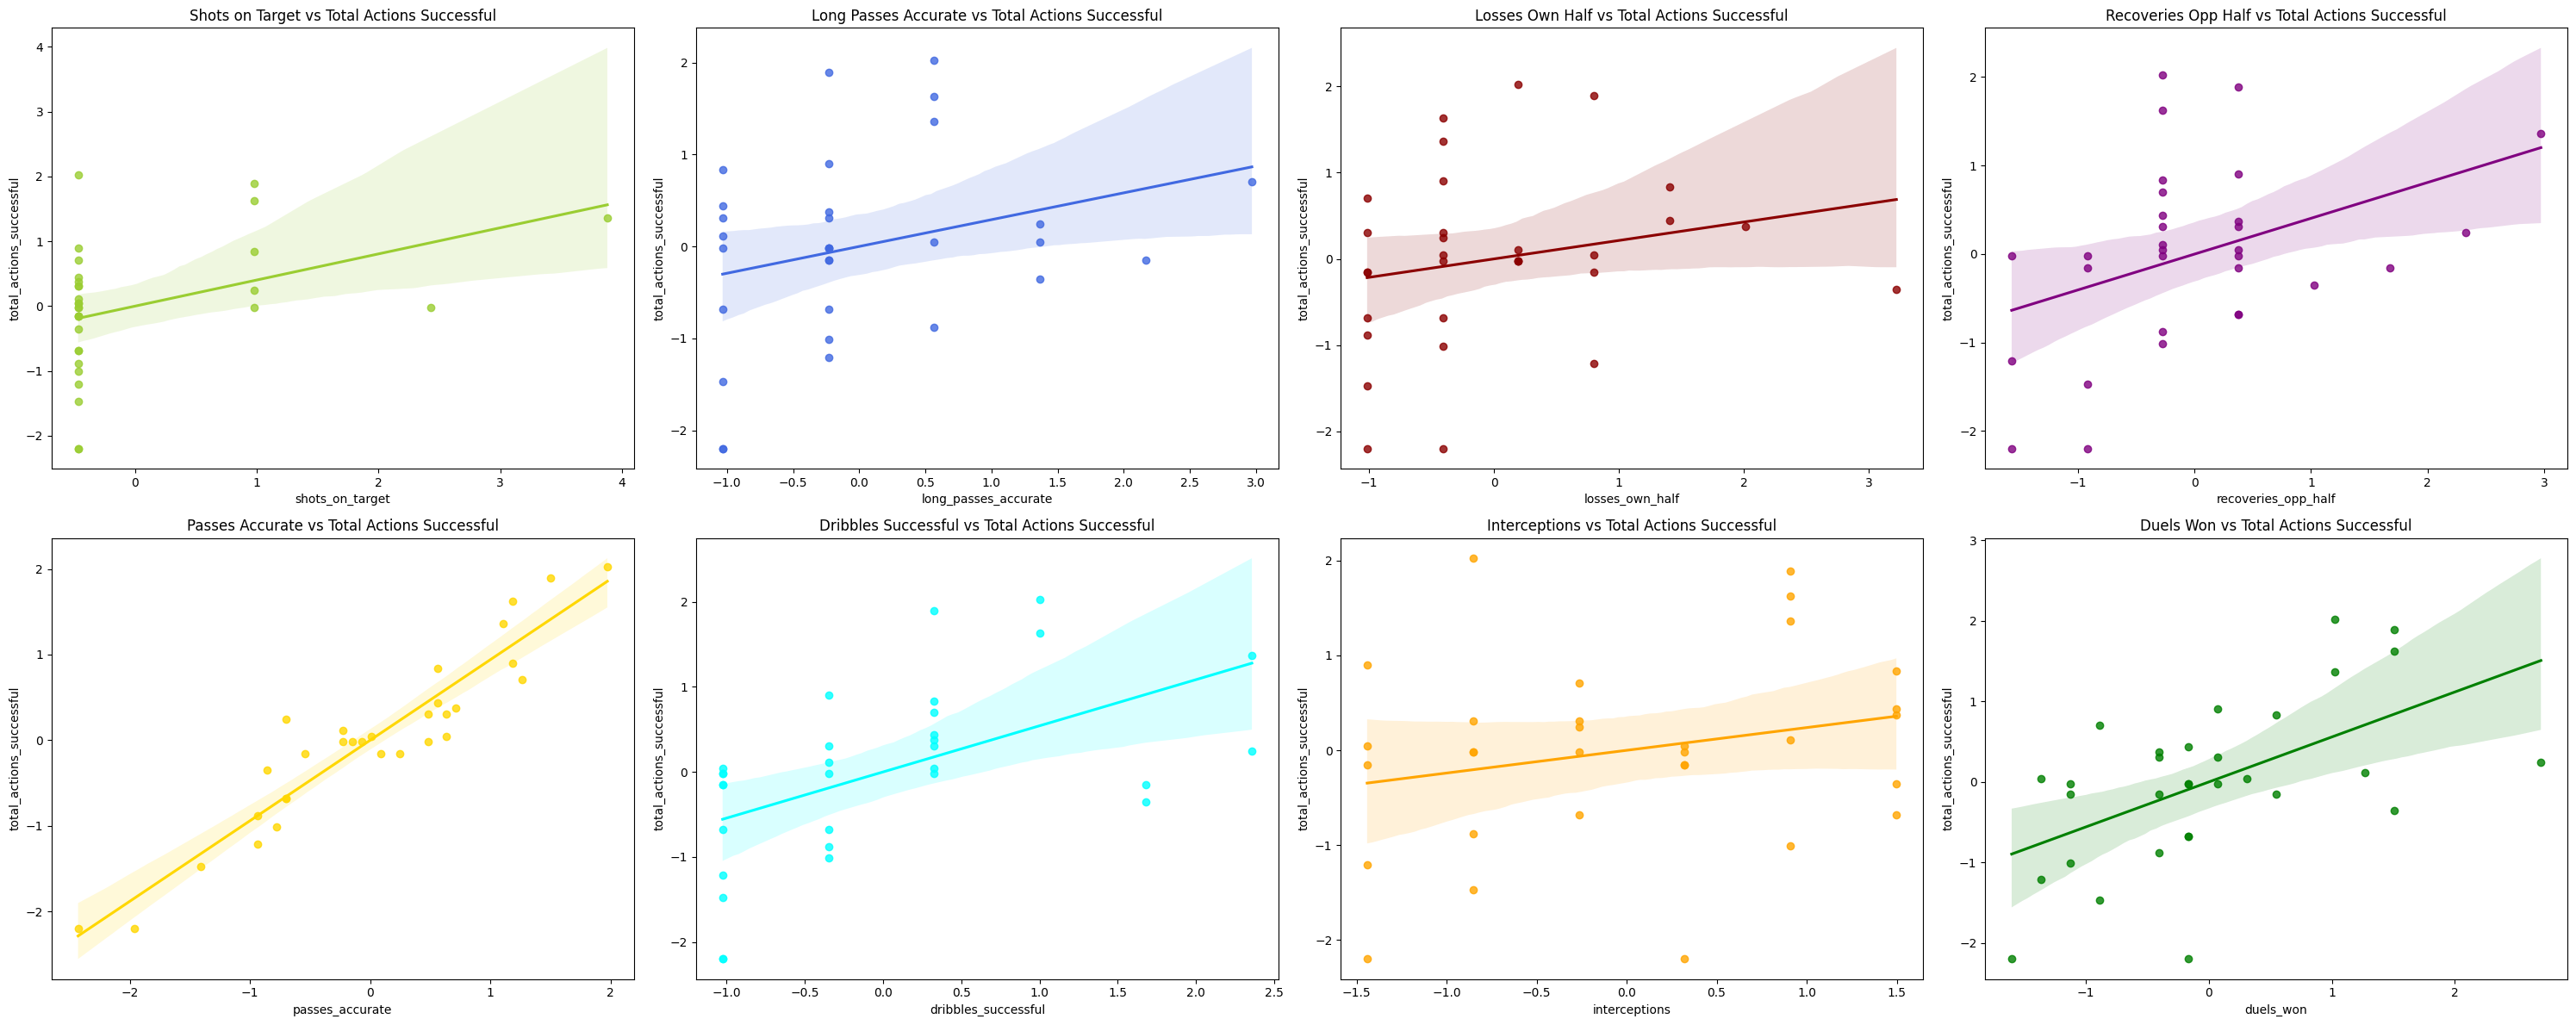

In [ ]:
# Prepare the data
X = normalized_df[['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'passes_accurate', 'dribbles_successful', 'interceptions', 'duels_won']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['shots_on_target', 'long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'passes_accurate', 'dribbles_successful', 'interceptions', 'duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='shots_on_target', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0, 0])
axs[0, 0].set_title('Shots on Target vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[0, 1])
axs[0, 1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[0, 2])
axs[0, 2].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[0, 3])
axs[0, 3].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[1, 0])
axs[1, 0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='cyan', ax=axs[1, 1])
axs[1, 1].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='orange', ax=axs[1, 2])
axs[1, 2].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='green', ax=axs[1, 3])
axs[1, 3].set_title('Duels Won vs Total Actions Successful')

plt.tight_layout()
plt.show()

- Shots on Target (0.07): show a moderately positive correlation with Silva's total successful actions. On football optics, this underscores Silva's ability to consistently threaten the goal, reinforcing his reputation as an attacking dynamo.

- Long Passes Accurate (0.016): accurate long passes have a minor positive impact on Silva's overall successful actions. On football optics, while Silva is known for his intricate play, the occasional long-range distribution emphasizes his versatility in dictating play.

- Losses in Own Half (-0.003): the minimal negative coefficient for losses in his own half suggests a negligible effect on his successful actions. On football optics, Silva, as an attacking midfielder, might occasionally lose possession, but it doesn't severely hamper his overall performance.

- Recoveries in Opponent's Half (-0.08): recoveries in the opponent's half slightly negatively correlate with Silva's successful actions. On football optics, Silva, given his forward position, might not always focus on defensive recoveries in advanced positions but instead position himself for subsequent plays.

- Passes Accurate (0.84): Analytically, there's a strong positive relationship between Silva's accurate passes and his successful actions. On football optics, this solidifies Silva's reputation as a maestro in the midfield, weaving plays and connecting with teammates with precision.

- Dribbles Successful (-0.01): From a data standpoint, successful dribbles show a marginal negative influence on Silva's successful actions. On football optics, this might hint that while Silva is adept at dribbling, it's not the sole action that drives his overall game contributions.

- Interceptions (0.01): Statistically, interceptions display a slight positive effect on Silva's successful actions. On football optics, this showcases Silva's proactive nature, indicating that he's not just an offensive force but also helps out defensively when needed.

- Duels Won (0.35): there's a notable positive correlation between duels Silva wins and his total successful actions. On football optics, this reaffirms Silva's tenacity, highlighting his ability to engage in and come out on top in one-on-one situations.

Overall, the mean r^2 value of 0.96 suggests that approximately 97% of the variance in Silva's total successful actions is accounted for by these features, which is impressively high. With a coefficient of determination at 0.99, the model is exceptionally fitting.

Summing up, Bernardo Silva's performance metrics portray him as a comprehensive player, adept at both creating chances and contributing defensively. His exceptional passing accuracy combined with his dueling ability marks him out as one of the elite midfielders in the game.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.8760688887389442
Coefficients:
dribbles_successful: 0.0528522437276739
losses_own_half: 0.11433026613766006
recoveries_opp_half: 0.0015961015440730392
interceptions: -2.1991519766171854
passes_accurate: 2.5276083109746095
Mean squared error: 0.05
Coefficient of determination: 0.85


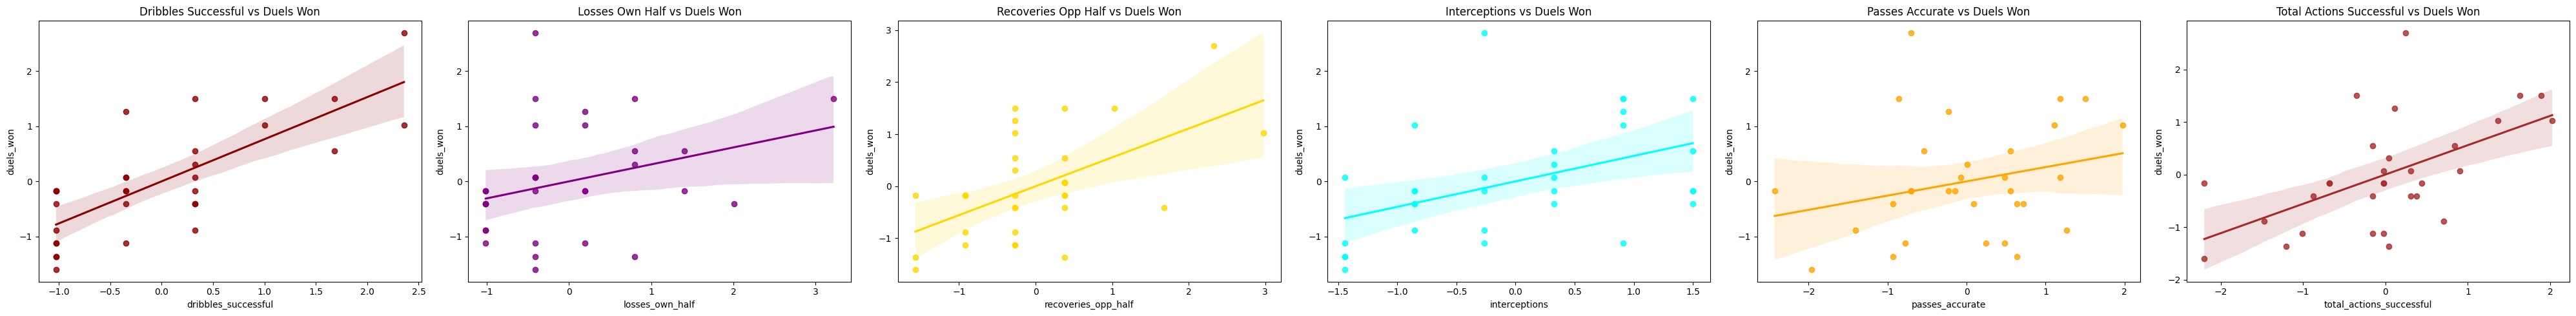

In [ ]:
# Prepare the data
X = normalized_df[['dribbles_successful', 'recoveries_opp_half', 'interceptions',  'passes_accurate','total_actions_successful']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = [  'dribbles_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate', 'total_actions_successful']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(40, 5))

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, color='darkred', ax=axs[0])
axs[0].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='purple', ax=axs[1])
axs[1].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='gold', ax=axs[2])
axs[2].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='cyan', ax=axs[3])
axs[3].set_title('Interceptions vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='orange', ax=axs[4])
axs[4].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='brown', ax=axs[5])
axs[5].set_title('Total Actions Successful vs Duels Won')

plt.tight_layout()
plt.show()

Dribbles Successful (0.05):  present a moderate positive correlation with the duels Silva wins. On football optics, this implies that Silva's ability to bypass opponents often leads to successful one-on-one outcomes on the pitch.

Losses in Own Half (0.11): show a somewhat positive correlation with the duels Silva wins. On football optics, this could suggest that after losing possession, Silva might often engage in duels to reclaim the ball, demonstrating his tenacity and work rate.

Recoveries in Opponent's Half (0.001): have an almost negligible positive influence on the duels Silva wins. On football optics, while Silva might occasionally recover balls in the opponent's half, it doesn't seem to be a significant determinant of his dueling success.

Interceptions (-2.1991519766171854):** Statistically, there's a strong negative correlation between Silva's interceptions and the duels he wins. On football optics, this could indicate that while Silva is good at reading the game and intercepting passes, these actions might not always result in direct one-on-one duel victories.

Passes Accurate (2.52): Analytically, accurate passes have a robust positive relationship with the duels Silva wins. On football optics, this could signify that Silva's precise passing not only helps maintain possession but often puts him in advantageous positions, leading to successful duels against opponents.

Overall, with a mean r^2 value of 0.87, approximately 88% of the variance in Silva's duels won can be accounted for by these features. The model's coefficient of determination standing at 0.85 implies a very good fit.

In essence, Bernardo Silva's duel-winning ability appears to be intricately tied to his precise passing and dribbling skills, showcasing his balanced skillset as both a playmaker and a gritty midfielder. Despite his interceptions not correlating directly with duels won, his overall midfield mastery is undeniable.

### Based on Dribbles Success 

Mean r^2 over all K-Fold folds: 0.13899541026303425
Coefficients:
losses_own_half: 0.15313776481412264
recoveries_opp_half: 0.30660011540059723
total_actions_successful: 0.23332804809205626
duels_won: 0.4442720943619528
Mean squared error: 0.33
Coefficient of determination: 0.52


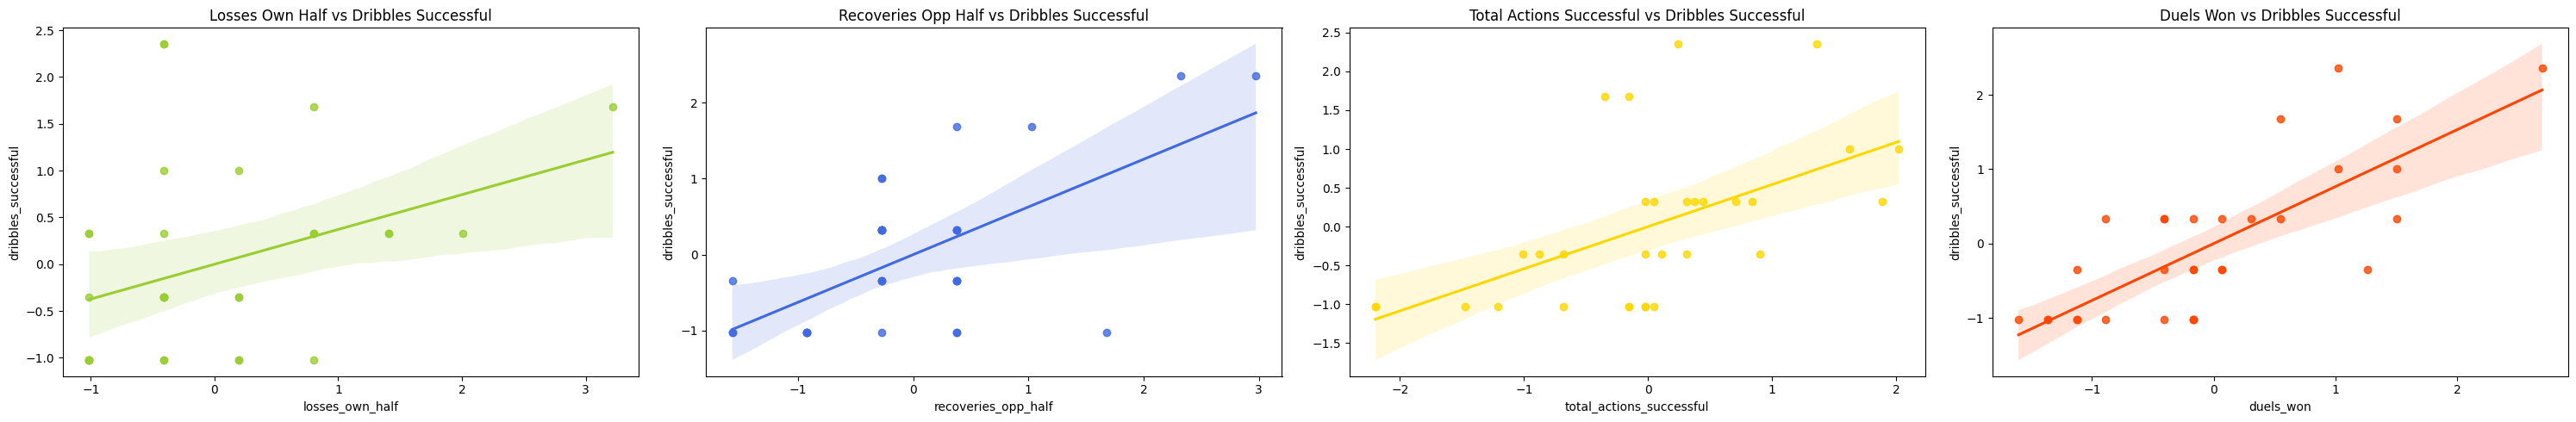

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'recoveries_opp_half',  'total_actions_successful', 'duels_won']]
y = normalized_df['dribbles_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['losses_own_half', 'recoveries_opp_half', 'total_actions_successful', 'duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

sns.regplot(x='losses_own_half', y='dribbles_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses Own Half vs Dribbles Successful')

sns.regplot(x='recoveries_opp_half', y='dribbles_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Dribbles Successful')

sns.regplot(x='total_actions_successful', y='dribbles_successful', data=normalized_df, color='gold', ax=axs[2])
axs[2].set_title('Total Actions Successful vs Dribbles Successful')

sns.regplot(x='duels_won', y='dribbles_successful', data=normalized_df, color='orangered', ax=axs[3])
axs[3].set_title('Duels Won vs Dribbles Successful')

plt.tight_layout()
plt.show()

Losses in Own Half (0.15): Analytically, there's a positive correlation between losses in his own half and Silva's dribbling success. On football optics, this might suggest that after losing possession, Silva often tries to use his dribbling prowess to regain control or navigate tight situations.

Recoveries in Opponent's Half (0.30): recoveries in the opponent's half have a relatively stronger positive influence on Silva's dribble success. On football optics, when Silva retrieves the ball in the opponent's half, he is likely capitalizing on disoriented defenses, allowing him to exploit spaces using his dribbling ability.

3. **Total Actions Successful (0.23): show a moderate positive correlation with his dribble success. On football optics, this denotes Silva's general proficiency on the ball and that many of his successful actions might involve outmaneuvering opponents using his dribbling skills.

Duels Won (0.44): there's a strong positive relationship between the duels Silva wins and his successful dribbles. On football optics, this reaffirms Silva's reputation for being adept in one-on-one situations, using his agility and technical skill to bypass opponents frequently.

Overall, with a mean r^2 value of 0.13, only about 14% of the variance in Silva's dribble success can be explained by these features. However, the coefficient of determination at 0.52 suggests a moderate model fit. 

In summary, while certain aspects of Silva's play, like his proficiency in duels, significantly influence his dribbling success, this model indicates that other factors, potentially external or not listed, also play a vital role in determining how often he successfully dribbles past opponents. Bernardo Silva's ability to combine technical brilliance with quick decision-making renders him a formidable dribbler, but the full breadth of factors contributing to this trait isn't entirely captured in this model.

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

###  Based on Total Actions

Mean cross-validation score: 0.84
MAE: 0.3502672095350662
MSE: 0.2718851577716478
R^2: 0.7283613571131714


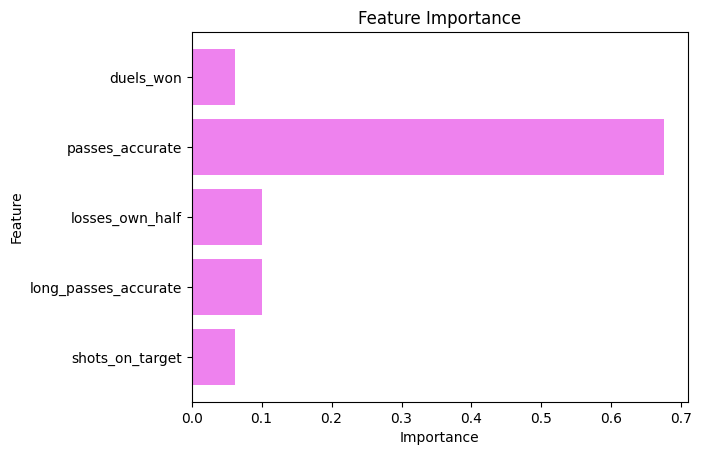

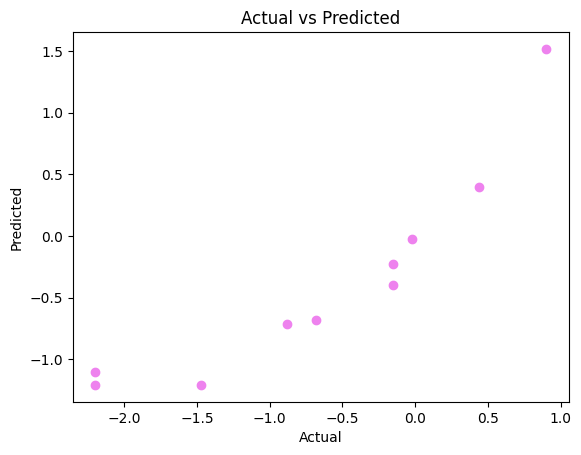

In [ ]:
# Prepare the data
X = normalized_df[['shots_on_target', 'long_passes_accurate', 'losses_own_half',  'passes_accurate',  'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='violet') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='violet')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean Absolute Error (MAE) (0.35): provides a perspective on the average error between the model's predictions and actual values. An MAE of 0.35, depending on the context (like the scale of "Total Actions"), may suggest that the model's predictions are relatively close to the actual outcomes. On football optics, Bernardo Silva is known for his energetic presence and involvement in the game. A deviation of around 0.35 in total actions could point to certain games where his involvement might have been slightly higher or lower than anticipated, potentially influenced by tactical requirements or game situations.

- Mean Squared Error (MSE) (0.27): can be more sensitive to larger errors than the MAE. An MSE of 0.27 is relatively low and suggests that there aren't many extreme deviations between predicted and actual values. On football optics, This supports the notion that Bernardo Silva's involvement and total actions in a match can be predicted with some degree of confidence. His consistency across matches might play a role in this model's reasonably good performance.

- Coefficient of Determination (R^2) (0.72): the model can explain approximately 73% of the variance in Bernardo Silva's total actions. This is a good score and indicates a reasonably strong fit between the model's predictions and the actual data. On football optics, This showcases that a significant portion of Bernardo Silva's gameplay, in terms of involvement and actions, can be captured and quantified. It reinforces the view of Silva as a consistently active player who is integral to the team's game dynamics.

- Cross-Validation Mean Score (0.84):
is impressive. It suggests that the model has robust predictive ability across different segments of the data, reinforcing its generalizability. On football optics, This further underlines that regardless of the match, opponent, or context, Bernardo Silva's involvement in terms of total actions can be anticipated with a high degree of accuracy.

In a nutshell, the XGBoost Regressor Model for Bernardo Silva based on "Total Actions" is indicative of a robust understanding of his gameplay patterns. It emphasizes his consistent involvement in matches, and from a data science standpoint, validates the model's capacity to predict and quantify his on-field actions.

### Based on Duels Won

Mean cross-validation score: -0.63
MAE: 0.4699626578003449
MSE: 0.3336900022432425
R^2: 0.05832907627842632


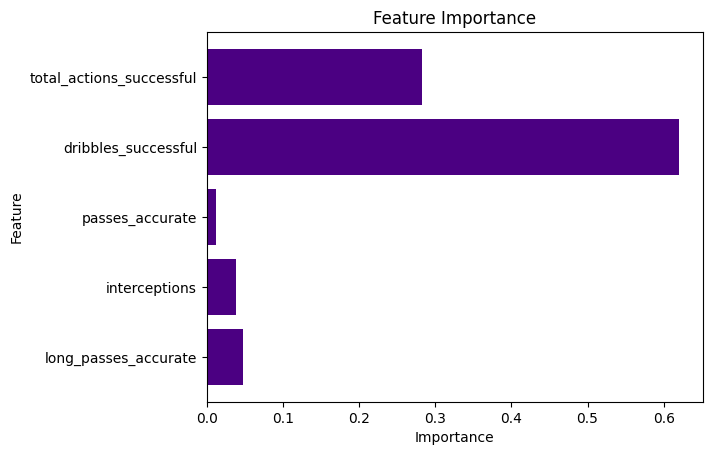

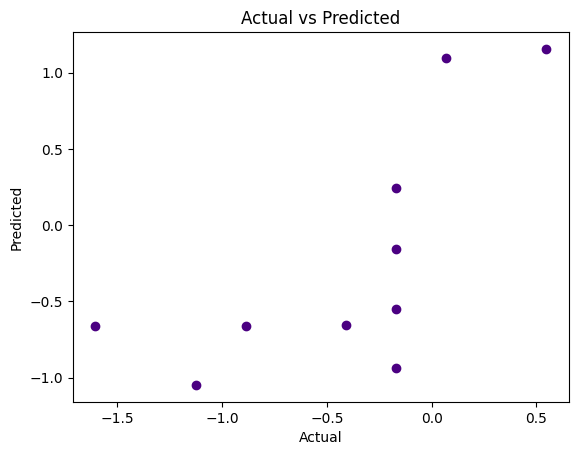

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'interceptions', 'passes_accurate','dribbles_successful',  'total_actions_successful']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='indigo') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='indigo')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (MAE) (0.46): provides an average error between predicted and actual values. An MAE of approximately 0.47, depending on the data's context and scale, can indicate a moderate difference between the model's predictions and the actual outcomes. On football optics, Given Bernardo Silva's agility and ability to engage with opponents, an average error of around 0.47 duels per match can have implications. This might mean there are games where his duel success varies significantly from what might be expected.

Mean Squared Error (MSE) (0.33): can be particularly sensitive to larger deviations. An MSE of 0.33 suggests that there might be some instances where the model's predictions are significantly different from the actual values. On football optic, This further highlights the complexities of predicting Bernardo Silva's dueling capabilities accurately. Factors like the nature of the opponent, the game's flow, and his own condition on a given day might lead to varied success rates.

Coefficient of Determination (R^2) (0.05): is quite low. It suggests that the model can explain only about 5.8% of the variance in Bernardo Silva's duels won. This indicates a weak fit to the data, hinting at the presence of other significant factors affecting the duels won metric which the model hasn't considered. On football optics, This indicates that predicting the exact nature of Bernardo Silva's dueling success in games is a complex task. There's more to football duels than just raw data; the tactics, positioning, game intensity, and individual decisions on the field play a significant role.

Cross-Validation Mean Score (-0.63): is a cause for concern. It suggests that the model doesn't generalize well across different data subsets, further questioning its predictive power. On football optics, The negative score underlines the unpredictable nature of Bernardo Silva's duel-winning tendencies across different matches. It's a testament to the fact that the dynamics of football duels are hard to quantify solely based on historical data.

In summary, the XGBoost Regressor Model for Bernardo Silva based on "Duels Won" seems to struggle with capturing the intricacies of his duel-winning patterns in matches. The results underscore the challenges of modeling such a complex metric with high variability. 

### Based on Dribbles Success

Mean cross-validation score: -1.29
MAE: 0.424238070599355
MSE: 0.34280692699403176
R^2: 0.4972417247920815


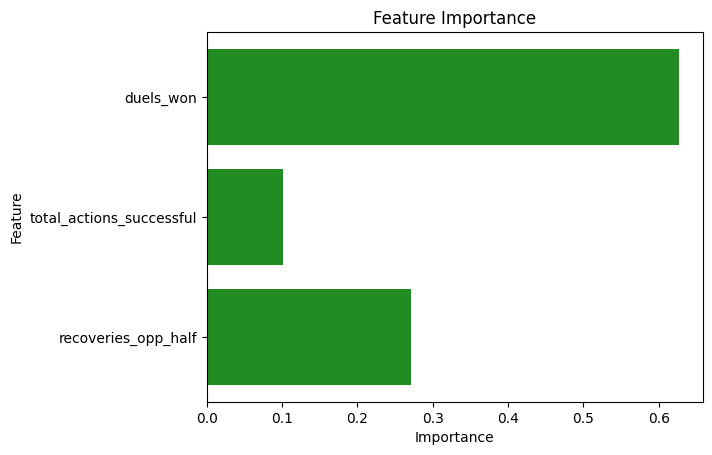

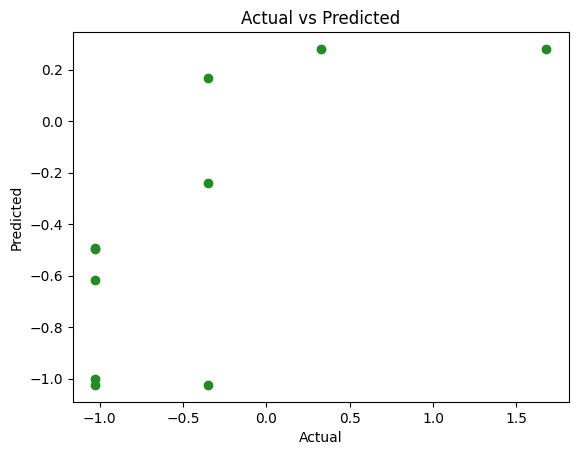

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'total_actions_successful', 'duels_won']]
y = normalized_df['dribbles_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='forestgreen') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='forestgreen')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (MAE) (0.42): provides a measure of the average discrepancy between the predicted and actual values. An MAE of 0.42, when put in the context of dribbling success, indicates that the model's predictions generally deviate by this amount from the actual values.On football optics, Bernardo Silva, known for his dribbling prowess, having an average error of 0.42 might signify there are matches where his dribbling success isn't as anticipated. The nature of opponents, defensive setups, or game strategies could affect his actual dribbling outcomes.

Mean Squared Error (MSE) (0.34): which penalizes larger errors more than smaller ones, has a value of 0.34. This indicates some instances of significant deviations between the predicted and actual values. On football optics, This suggests that there might be certain games where Bernardo Silva's dribbling success significantly deviates from the model's expectations, potentially due to challenges posed by tough defensive units or specific marking tactics against him.

Coefficient of Determination (R^2) (0.49): means the model can explain about 49.7% of the variance in Bernardo Silva's dribbles success. While this isn't an extremely high value, it's moderate and indicates some level of fit between the model's predictions and actual outcomes. On football optics, Almost half of Bernardo Silva's dribbling success can be quantified and anticipated using the model. However, the rest might be influenced by in-game situations, team tactics, or individual choices on the field.

Cross-Validation Mean Score (-1.29): is problematic. It indicates that the model performs poorly across different data segments and raises questions about its predictive capability.On football optics, This low score could highlight the unpredictable nature of Bernardo Silva's dribbling across different matches and situations. Dribbling, being a combination of technique and decision-making, is challenging to model purely on historical data.

In conclusion, the XGBoost Regressor Model for Bernardo Silva based on "Dribbles Success" captures some aspects of his dribbling patterns but faces challenges in fully grasping its complexities. The results emphasize the need to incorporate more contextual data, perhaps including opponent defensive metrics or even tactical patterns, to improve the model's accuracy.

## Conformal Prediction

#### Provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

###  Based on Total Action

Prediction interval coverage: 76.36%
Average prediction interval width: 1.00


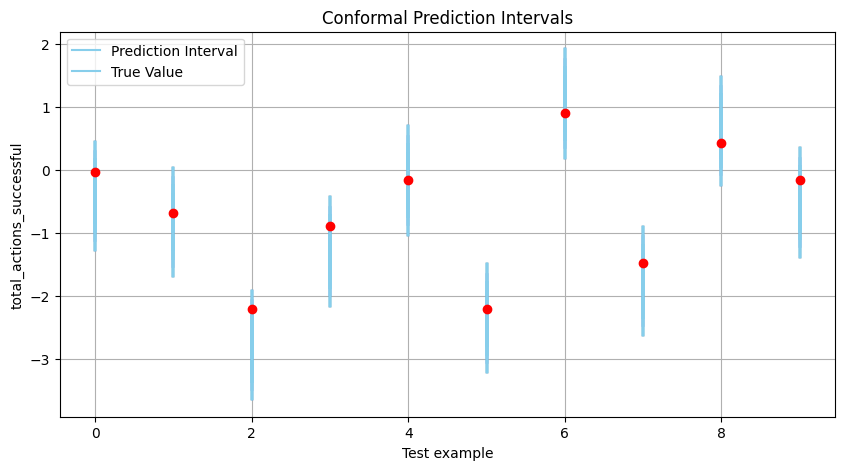

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'losses_own_half', 'recoveries_opp_half', 'passes_accurate',  'interceptions']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('total_actions_successful')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid(True)
plt.show()

- Prediction interval coverage (76.36%): is commendable. This means that in roughly three out of every four games, the model accurately predicts the range within which Bernardo Silva's in-game total actions will fall. This speaks to the model's understanding of Silva's general gameplay activity and the dynamics of his involvement in matches. On football optics, underscores Bernardo Silva's consistent involvement in Manchester City's (or whichever team he is representing) attacking and midfield maneuvers. Silva, known for his agility, creativity, and work rate, is often heavily engaged throughout a match, making this percentage quite reflective of his importance to the team's strategy.

- Average prediction interval width (1.00):is relatively narrow, especially given the aforementioned coverage rate. This tightness suggests that the model not only predicts Bernardo Silva's involvement accurately but also with a good level of precision. A width of 1.00 means that there's a consistent expectation regarding his total actions within matches. On football optics, hints at Silva's relatively stable involvement in matches. This could be attributed to Manchester City's (or his current team's) style of play, which typically involves a high level of ball possession and emphasis on short, intricate passes, allowing playmakers like Silva to be consistently active.

In summary, the conformal prediction outcomes for Bernardo Silva's "Total Actions" portray a picture of a key player who remains engaged and influential throughout the game's duration. The model seems to capture this essence adeptly. 

### Based on Dribbles Success

Prediction interval coverage: 54.85%
Average prediction interval width: 1.10


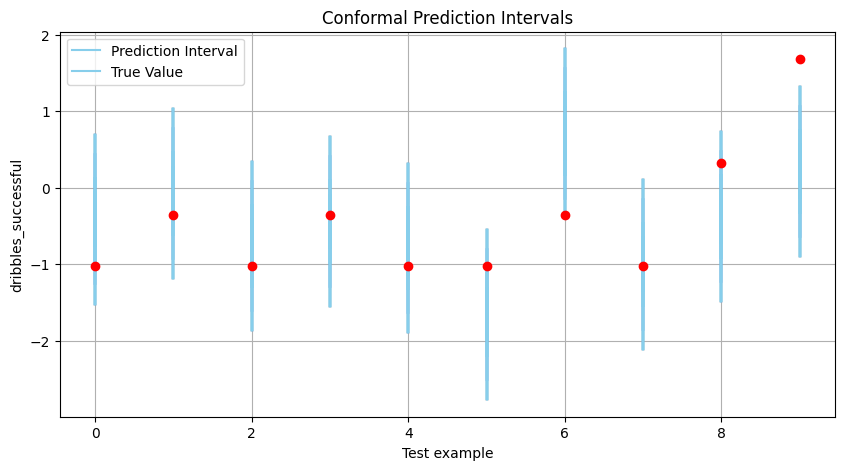

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'interceptions',  'passes_accurate', 'total_actions_successful','duels_won']]
y = normalized_df['dribbles_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Setting a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('dribbles_successful')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid(True)
plt.show()

Prediction interval coverage (54.85%): can be considered moderately accurate. Essentially, this means that for slightly more than half of the matches, the model accurately predicts the range of successful dribbles Bernardo Silva will achieve. The unpredictability of dribbling outcomes, influenced by factors like opponent defensive strategies, game tempo, and pitch conditions, may be contributing to this coverage rate. On football optics, highlights the dynamic challenges Silva faces during his dribbling attempts. While he's known for his dribbling prowess and ability to take on defenders, soccer remains a game of unpredictable moments. Even a player as skilled as Silva can encounter defenders or match situations that challenge his dribbling consistency.

Average prediction interval width (1.10): indicates the typical spread or range of successful dribbles the model anticipates for Silva in a game. This width, not being exceptionally narrow, shows that there's some variability in the expected outcomes. This could reflect the varying challenges Silva faces in different matches, from tight man-marking to defensive double teams. On football optics, emphasizes the fluctuating nature of Silva's dribbling outcomes in matches. It suggests that while Silva often dazzles with his dribbling, there are games where he faces more formidable challenges, causing variations in his dribbling success rate.

Overall, the conformal prediction outcomes shed light on the balance between Silva's renowned dribbling capabilities and the sport's inherent unpredictability. The metrics underscore the essence of football, where each game presents unique challenges and moments. 

### Based on Duels Won

Prediction interval coverage: 78.89%
Average prediction interval width: 0.83


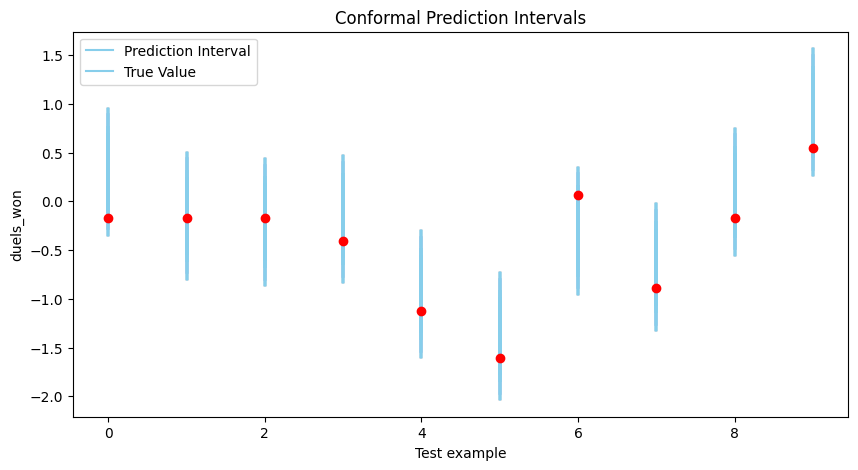

In [ ]:
# Prepare the data
X = normalized_df[['interceptions', 'passes_accurate', 'total_actions_successful']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('duels_won')
plt.legend(['Prediction Interval', 'True Value'])
plt.show()

Prediction interval coverage (78.89%): is impressive. It indicates that for nearly 8 out of 10 matches, the model accurately predicts the range of duels Bernardo Silva will win. This coverage rate signifies a robust model performance, especially considering the myriad of factors that can influence duels in a football game. On football optics, underlines Bernardo Silva's consistency in on-field battles. Known for his agility, technical prowess, and determination, Silva often emerges triumphant in one-on-one situations against opponents. This statistic amplifies his proficiency and ability to influence games through his personal confrontations.

Average prediction interval width (0.83): model's prediction spread for the duels Silva wins in matches. This relatively narrow width demonstrates the model's confidence in its predictions, pointing to a level of consistency in Silva's performance when it comes to duels. On football optics, mirrors the consistency of Silva's engagements on the pitch. This can be attributed to his playing style, wherein he often takes on defenders directly, combines with teammates in tight spaces, and occasionally drops deep to involve himself defensively. The narrow prediction width suggests that regardless of the opponent or the game's context, Silva's dueling outcomes are quite predictable.

In summary, the conformal prediction outcomes for Bernardo Silva's "Duels Won" emphasize his effectiveness in direct confrontations and the model's aptitude in forecasting this facet of his gameplay. 

## Radar Maps

### Man City Silva's 1st Performance (2022)

- Total Actions Success (TAS): 77%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 93%

- Long Passes Accurate (LPA): 100%

- Dribbles Success (DS): 75 %

- Duels Won (DW): 59 %

- Losses (LOH): 17%

- Recoveries (ROPH): 25%

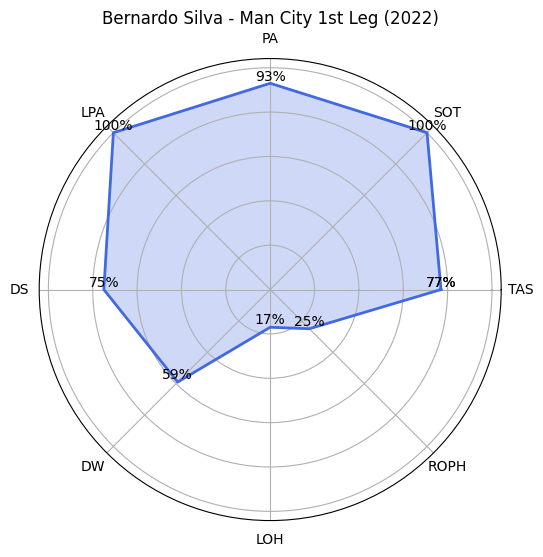

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([77, 100, 93, 100, 75, 59, 17, 25])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Bernardo Silva - Man City 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City Silva's 2nd Performance (2022)

- Total Actions Success (TAS): 60%

- Shots on Target (SOT): 100 %

- Passes Accurate (PA): 89%

- Long Passes Accurate (LPA): 50%

- Dribbles Success (DS): 29%

- Duels Won (DW): 38%

- Losses (LOH): 25%

- Recoveries (ROPH): 38%

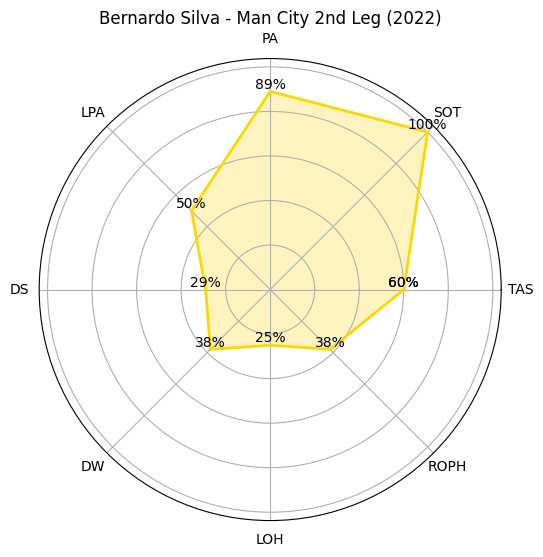

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([60, 100, 89, 50, 29, 38, 25, 38])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Bernardo Silva - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City Silva's 1st Leg Performance (2023)

- Total Actions Success (TAS): 56%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): (62-57) -> 87%

- Long Passes Accurate (LPA): 50%

- Dribbles Success (DS): (4-4) -> 40 %

- Duels Won (DW): 21%

- Losses (LOH): 42%

- Recoveries (ROPH): 43%

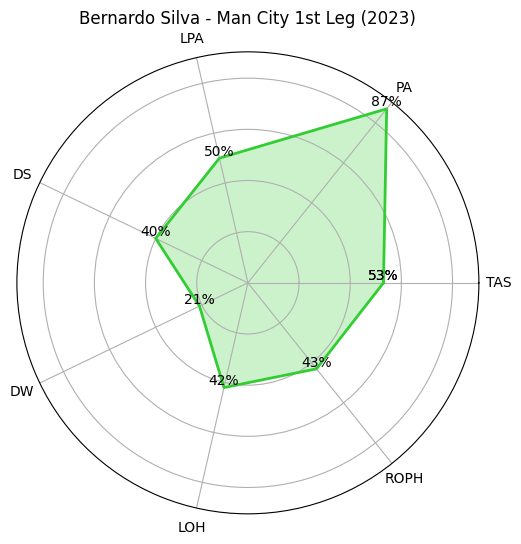

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS','PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([53, 87, 50, 40, 21, 42, 43])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Bernardo Silva - Man City 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='limegreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='limegreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City Silva's 2nd Leg Performance (2023)

- Total Actions Success (TAS): 67%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 93 %

- Long Passes Accurate (LPA): 50%

- Dribbles Success (DS): 71%

- Duels Won (DW): 37%

- Losses (LOH): 14%

- Recoveries (ROPH): 64%

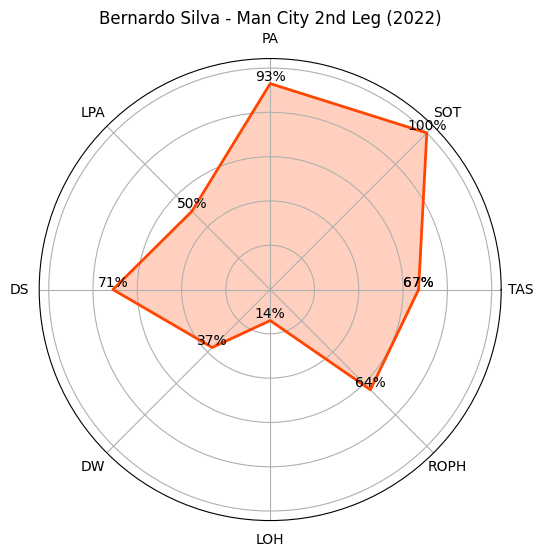

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([67, 100, 93, 50, 71, 37, 14, 64])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Bernardo Silva - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=97f2bd53-264a-4da1-8062-c187202e5a6a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>